#  Hotel Booking Cancellation Prediction


##  Business Context

INN Hotels Group, a hotel chain in Portugal, faced rising operational costs due to frequent booking cancellations — particularly last-minute ones — resulting in unoccupied rooms, higher distribution expenses, and lower profit margins.

As part of the Data Science team, I collaborated with Revenue Management and Guest Services to develop a machine learning model that predicts the likelihood of cancellations using historical booking data. The model was designed to minimize false negatives, helping prevent revenue losses, while also reducing false positives to ensure efficient room utilization.

This solution helped the hotel anticipate cancellations, implement proactive overbooking strategies, and design policies that improved occupancy and profitability.



##  Project Objective

The goal of this project is to predict whether a hotel booking will be canceled. Accurate predictions allow the business to:
- Minimize last-minute losses due to unoccupied rooms.
- Adjust overbooking strategies accordingly.
- Personalize guest offers based on cancellation probability.

We compare logistic regression and decision tree classifiers and select the most suitable model based on recall, precision, and business impact.



##  Data Description

This project uses a dataset called INNHOTELSGROUP.csv, which contains booking records from customers, including details about their stay and reservation preferences. Below is a summary of the available features:

**Data Dictionary**
- **Booking_ID**: Unique identifier for each booking.
- **no_of_adults**: Number of adults included in the booking.
- **no_of_children**: Number of children included in the booking.
- **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) stayed or booked.
- **no_of_week_nights**: Number of weekday nights (Monday to Friday) stayed or booked.
- **type_of_meal_plan**: Type of meal plan selected by the customer.
- **required_car_parking_space**: Indicates if the customer requested parking (0 = No, 1 = Yes).
- **room_type_reserved**: Encoded value representing the reserved room type (provided by the hotel).
- **lead_time**: Days between booking and arrival.
- **arrival_year**, **arrival_month**, **arrival_date**: Date of arrival.
- **market_segment_type**: Market segment of the customer (e.g., Online, Corporate).
- **repeated_guest**: Indicates if the customer is a returning guest (0 = No, 1 = Yes).
- **no_of_previous_cancellations**: Number of previous bookings canceled by the customer.
- **no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer.
- **avg_price_per_room**: Average price per day of the booking (in euros).
- **no_of_special_requests**: Number of special requests made (e.g., high floor, room view).
- **booking_status**: Booking outcome (0 = Not canceled, 1 = Canceled).


In [4]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [5]:
data_path = "data/INNHotelsGroup.csv"


df = pd.read_csv(data_path)

## First Look at the Dataset

Display the first few rows of the dataset to confirm successful loading and inspect initial data structure.

In [6]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [7]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [8]:
print("There are",df.shape[0],"rows and",df.shape[1],"columns")

There are 36275 rows and 19 columns


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


## Univariate Analysis

To understand the distribution of individual numerical variables, we combine a boxplot (to highlight outliers) and a histogram (to observe skewness, central tendency, and concentration of values).

In [13]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

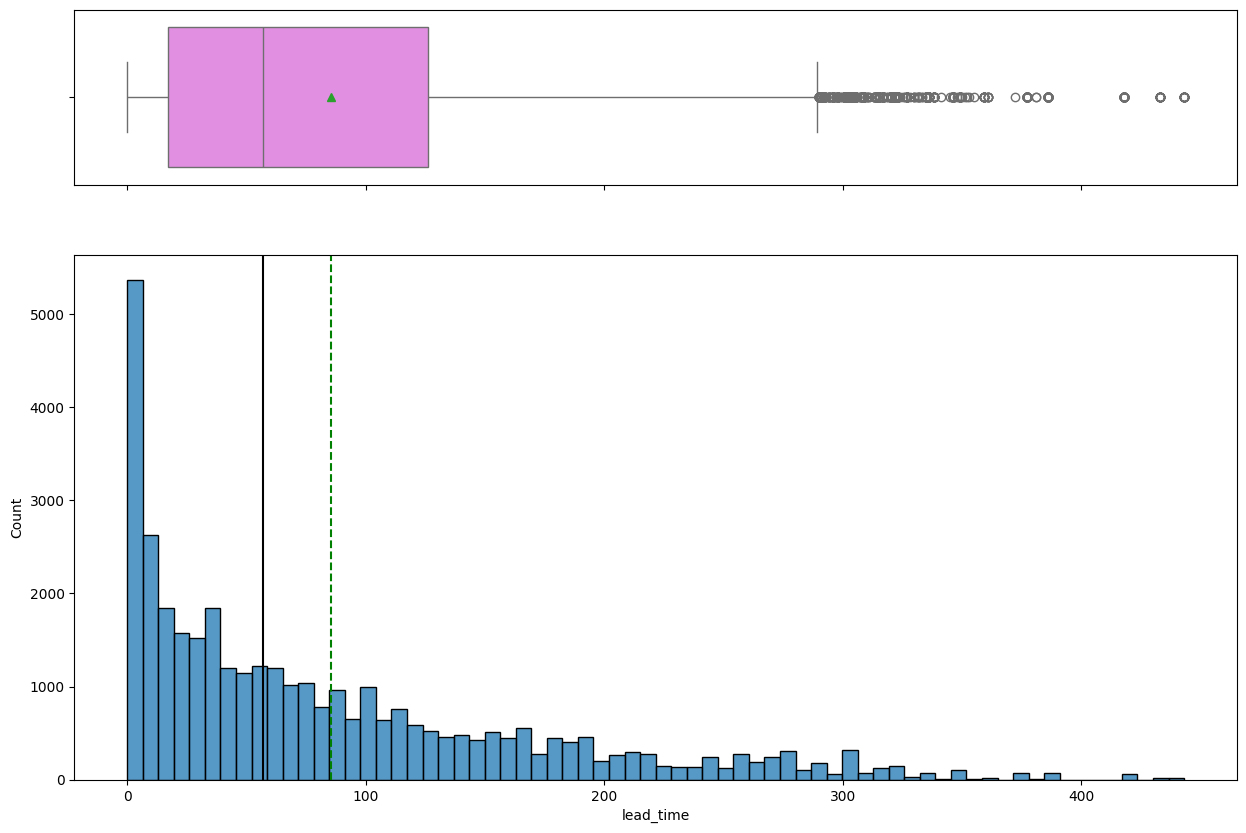

In [14]:
histogram_boxplot(df, "lead_time")

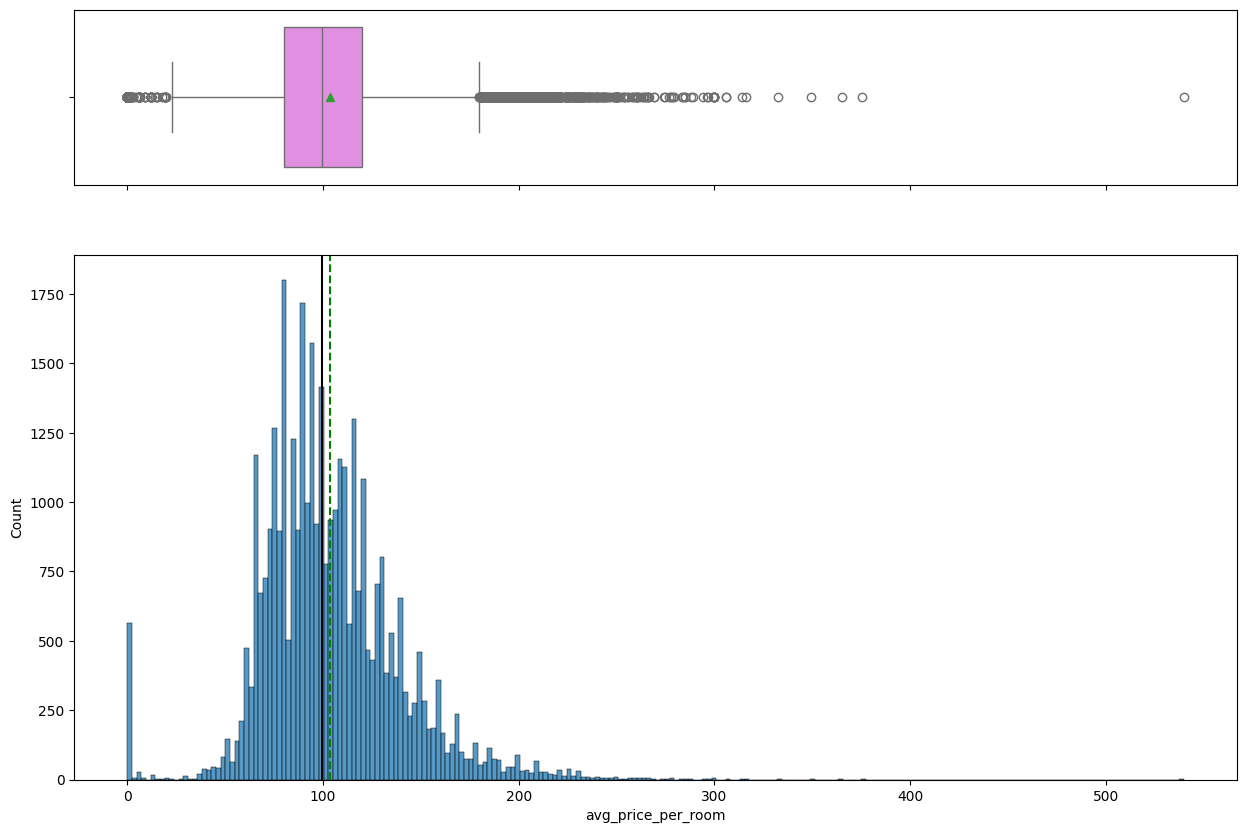

In [15]:
histogram_boxplot(df,"avg_price_per_room")

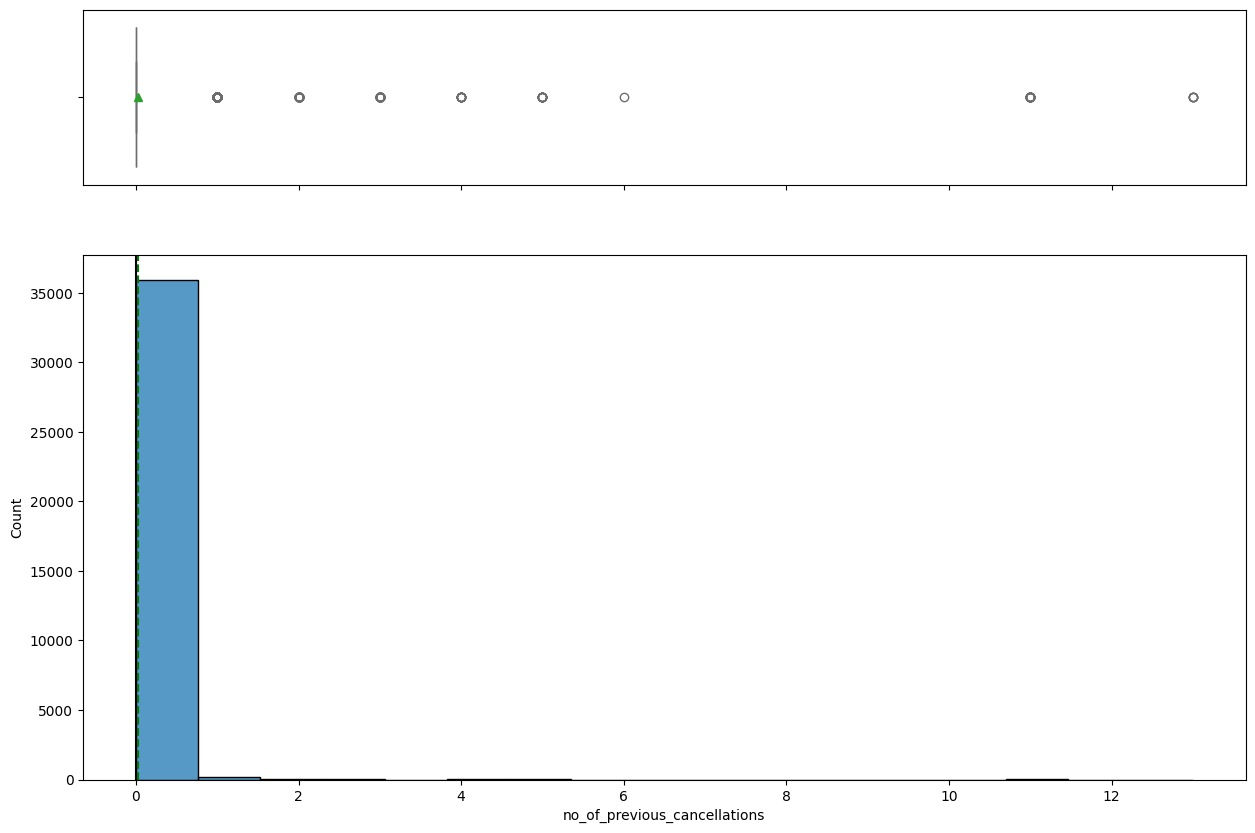

In [16]:
histogram_boxplot(df,'no_of_previous_cancellations')

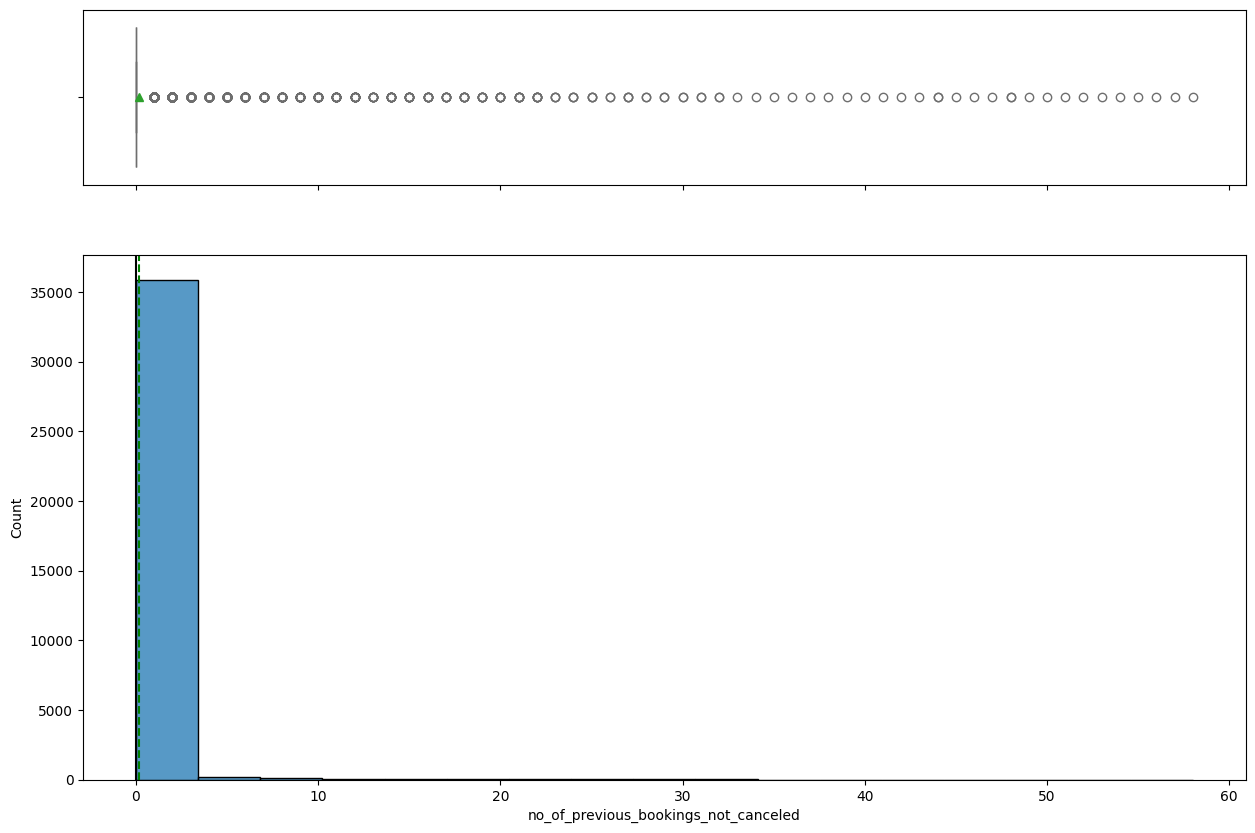

In [17]:
histogram_boxplot(df,'no_of_previous_bookings_not_canceled')

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
         palette="bright"
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

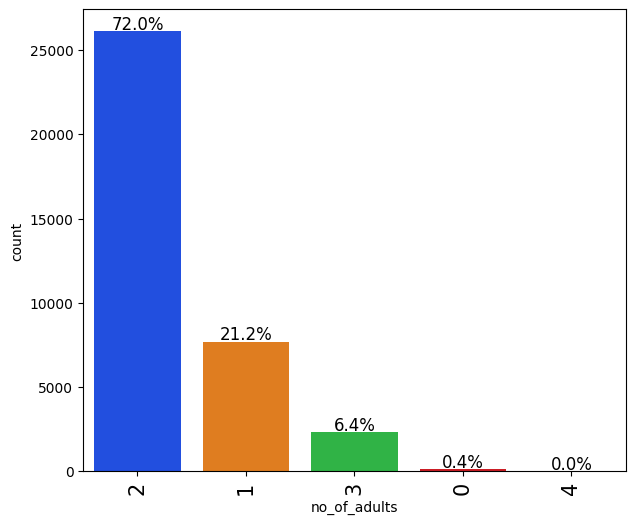

In [19]:
labeled_barplot(df, "no_of_adults", perc=True)

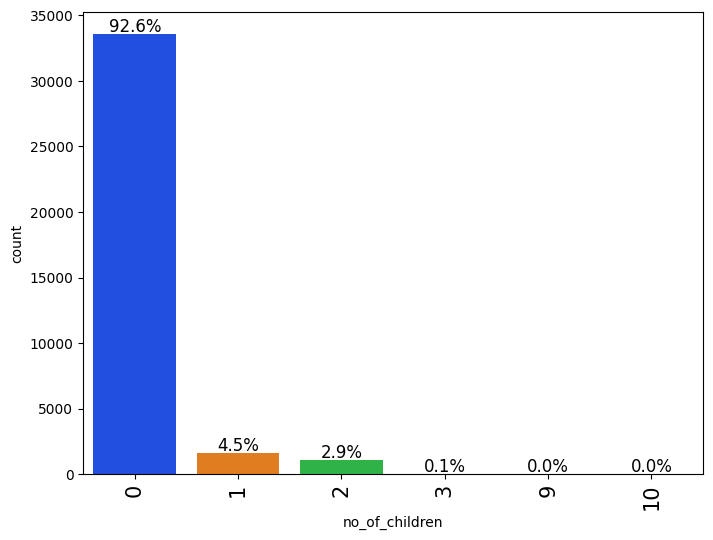

In [20]:
labeled_barplot(df,'no_of_children',perc=True)

In [21]:
# replacing 9, and 10 children with 3
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

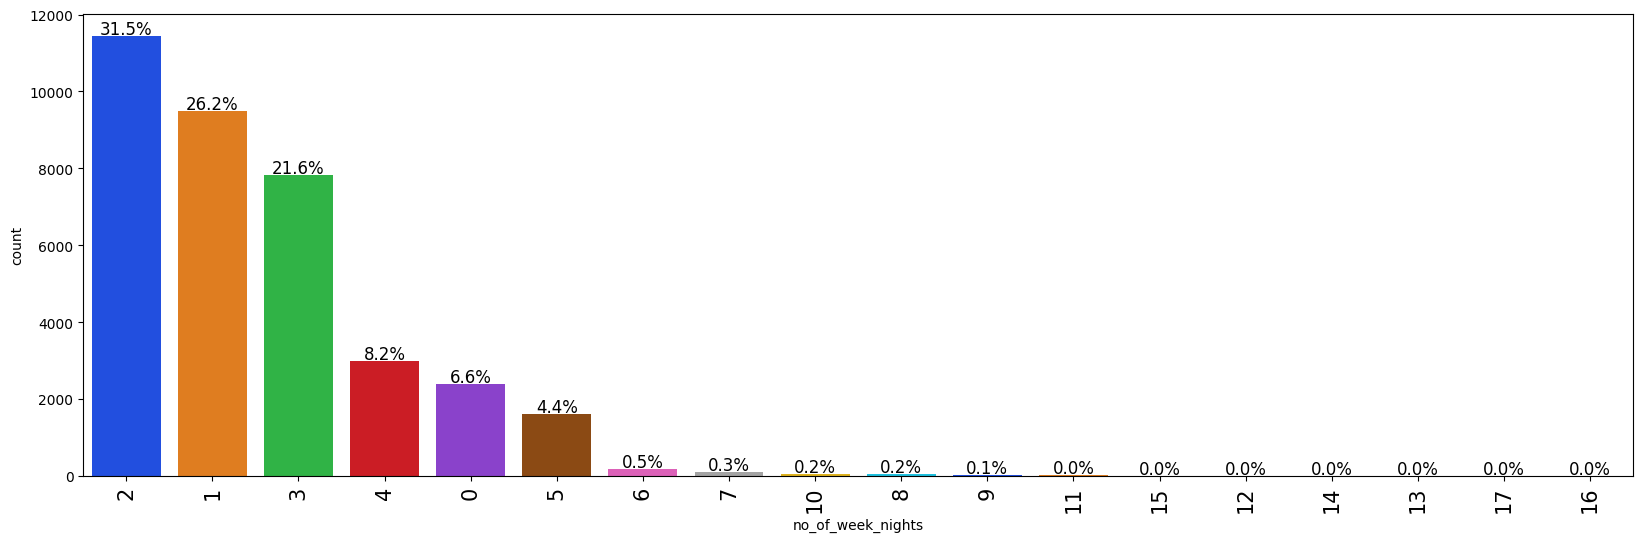

In [22]:
labeled_barplot(df,'no_of_week_nights',perc=True)

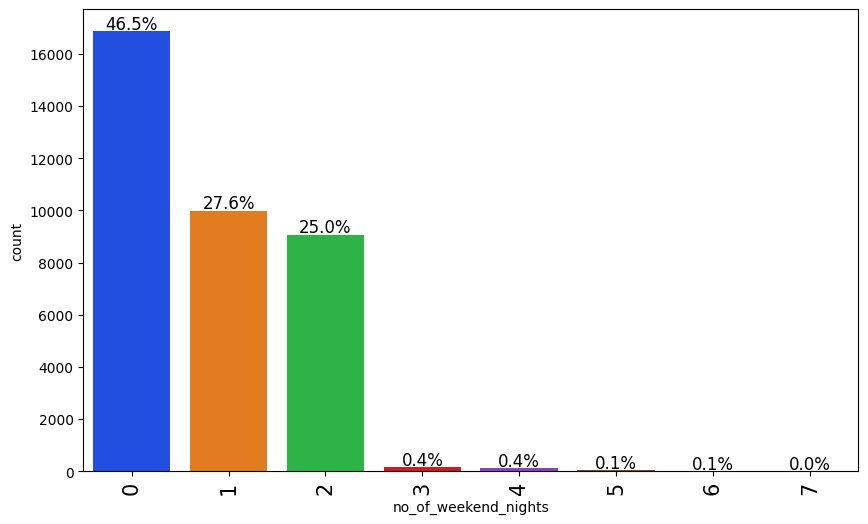

In [23]:
labeled_barplot(df,'no_of_weekend_nights',perc=True)

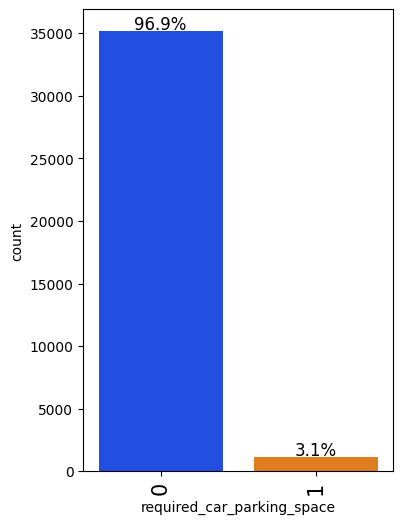

In [24]:
labeled_barplot(df,'required_car_parking_space',perc=True) 

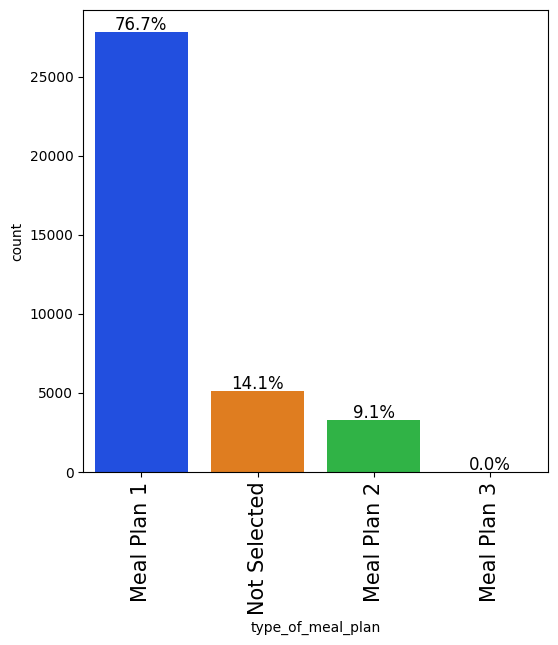

In [25]:
labeled_barplot(df,"type_of_meal_plan",perc=True)

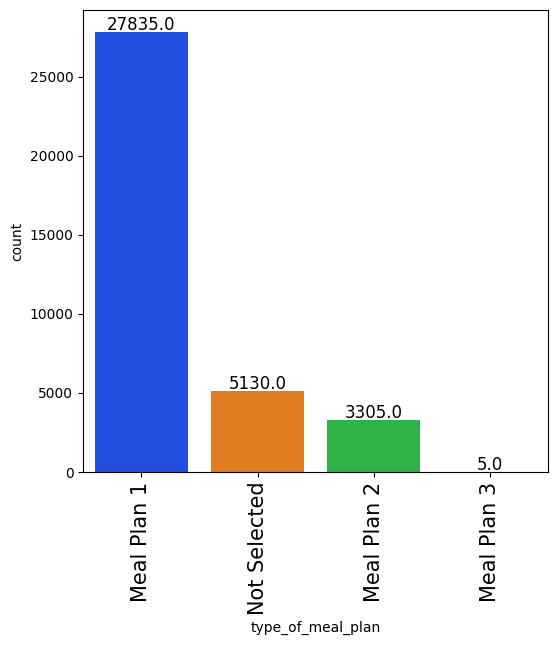

In [26]:
labeled_barplot(df,"type_of_meal_plan")

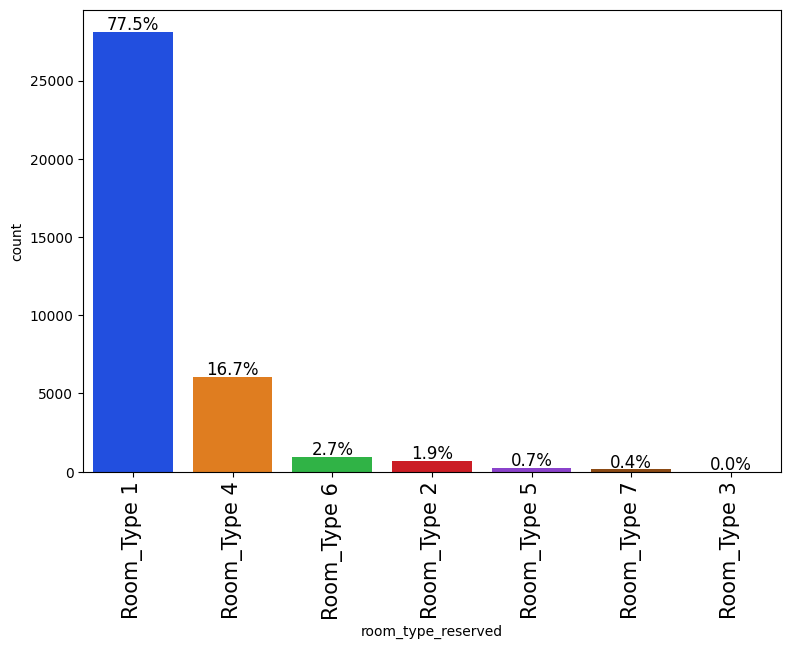

In [27]:
labeled_barplot(df,"room_type_reserved",perc=True)

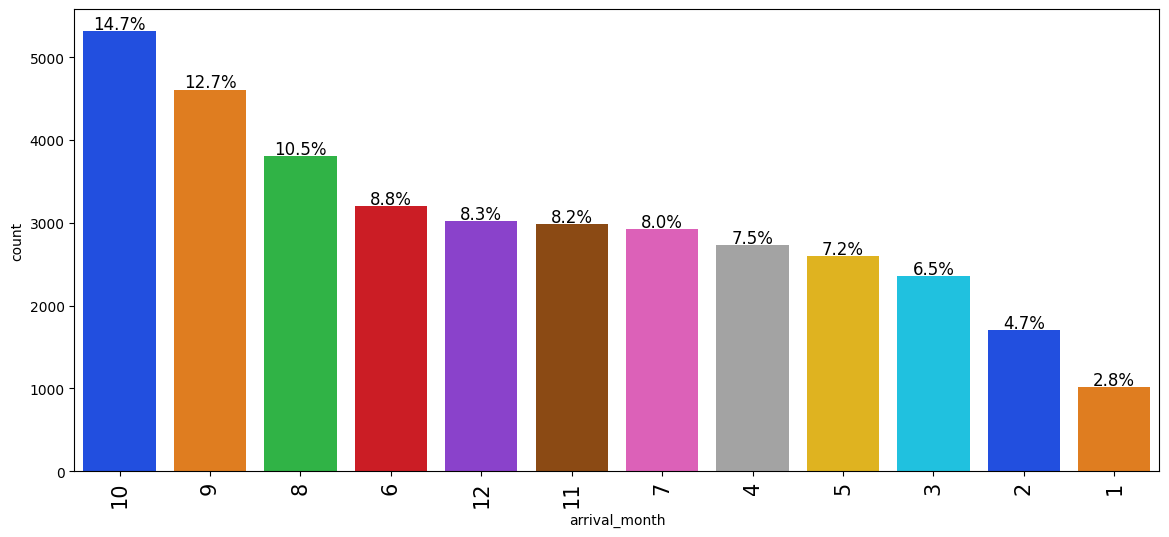

In [28]:
labeled_barplot(df,"arrival_month",perc=True)

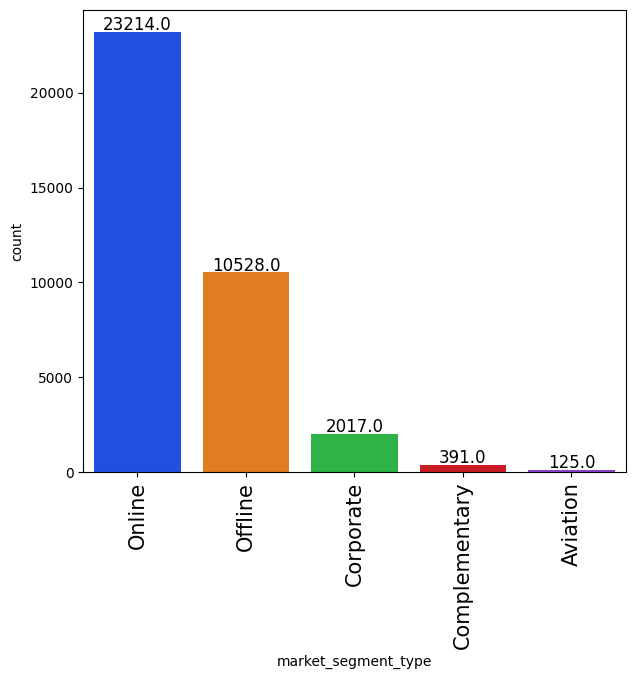

In [29]:
labeled_barplot(df,"market_segment_type") 

In [30]:
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

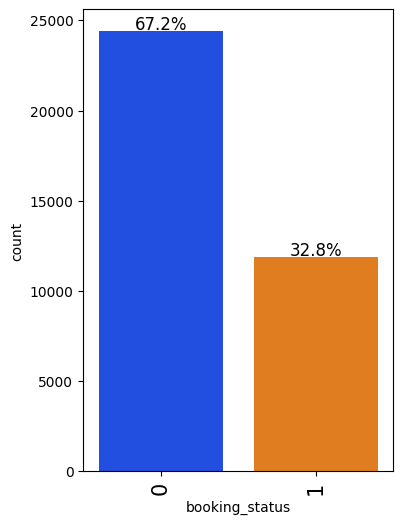

In [31]:
# 0 = no cancel and 1 = cancel
labeled_barplot(df,"booking_status",perc=True)

## Bivariate Analysis

In this section, we analyze the relationship between key independent variables and the target variable (booking_status) to uncover potential predictors of booking cancellations.

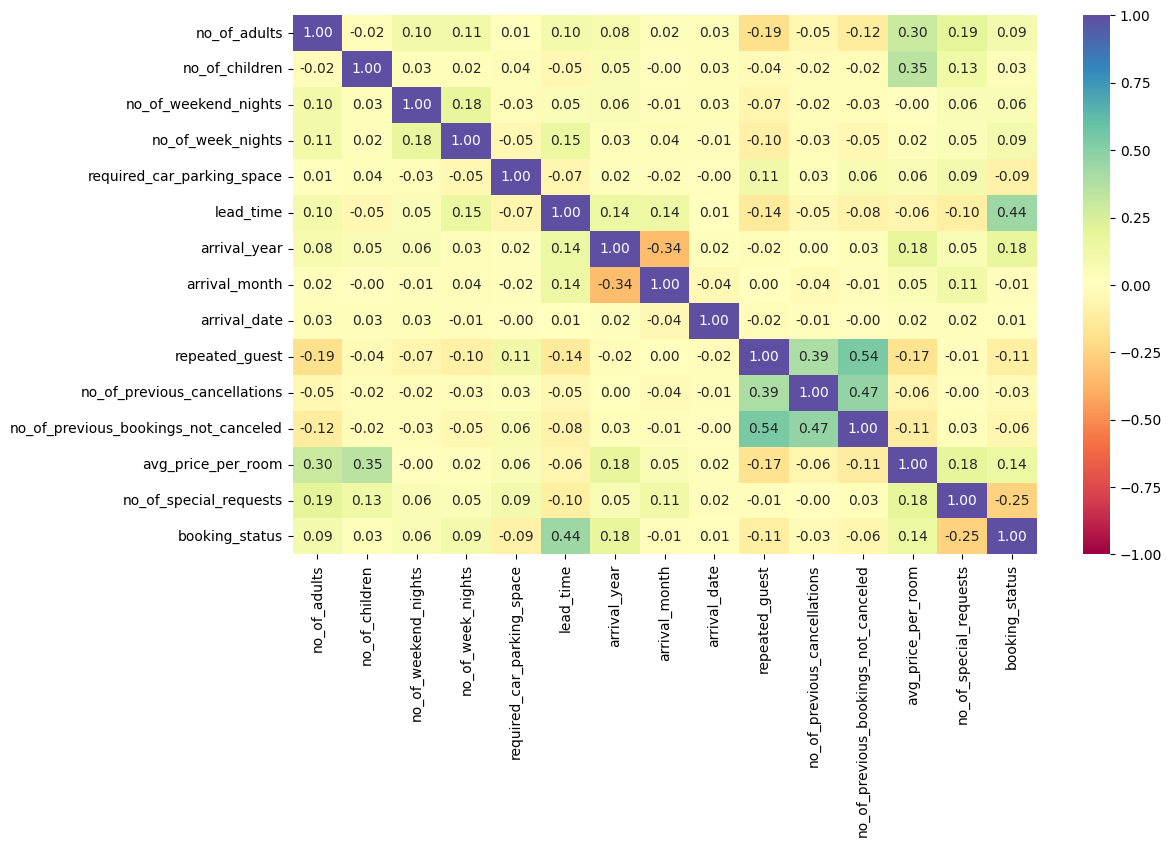

In [32]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Interpretation 

- There is a **moderate positive correlation** between lead_time and booking_status, suggesting that bookings made further in advance are more likely to be canceled.
- avg_price_per_room has a weak positive correlation with both no_of_adults and no_of_children, indicating that larger parties may book more expensive rooms.
- no_of_special_requests shows a **negative correlation** with booking_status, which may imply that guests who make more requests are less likely to cancel.
- Other correlations are relatively weak, indicating minimal multicollinearity concerns among most variables.


In [33]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

In [34]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### How Do Hotel Prices Vary Across Different Market Segments?

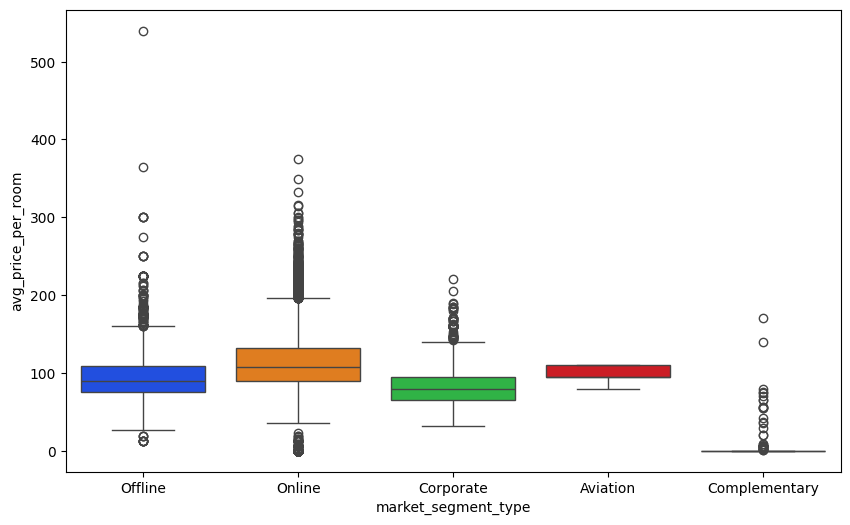

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="market_segment_type", y="avg_price_per_room",palette="bright")
plt.show()

### Interpretation

- The **Online** and **Offline** segments show the highest median room prices, along with greater variability and more high end outliers.
- **Corporate** bookings tend to have slightly lower prices and tighter distribution, possibly due to negotiated rates.
- **Aviation** bookings have very limited price variation, likely reflecting fixed corporate agreements.
- **Complementary** bookings are almost exclusively at €0, confirming that this segment includes promotional or free stays.

--- 

###  How Does Booking Status Vary Across Market Segments, and Is It Influenced by Room Price?

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


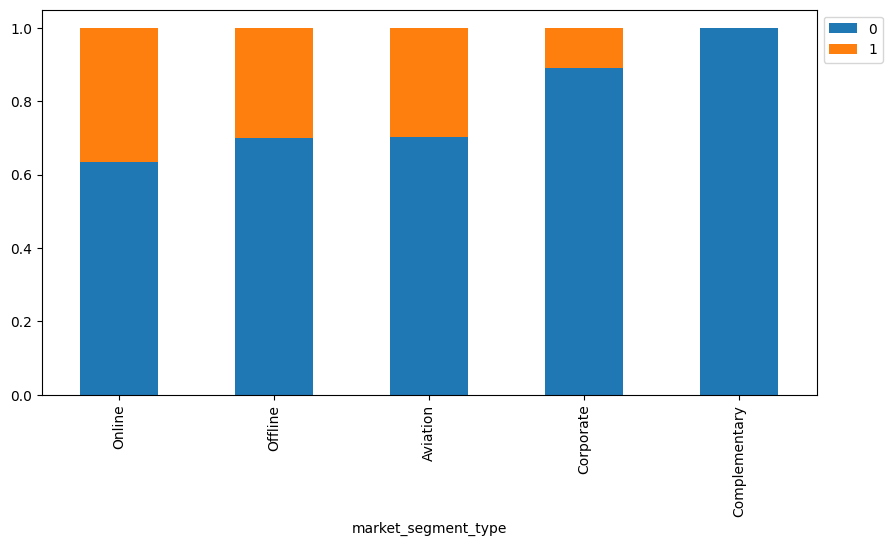

In [36]:
stacked_barplot(df, "market_segment_type", "booking_status")

### Interpretation

- The **Online** segment has the highest cancellation rate, with over one third of bookings ending in cancellation.
- **Corporate** and **Complementary** bookings show the **lowest cancellation rates**, likely due to company agreements and fully subsidized stays, respectively.
- **Offline** and **Aviation** segments have similar moderate cancellation behavior.

--- 

### Does the Number of Special Requests Influence Booking Cancellations?

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


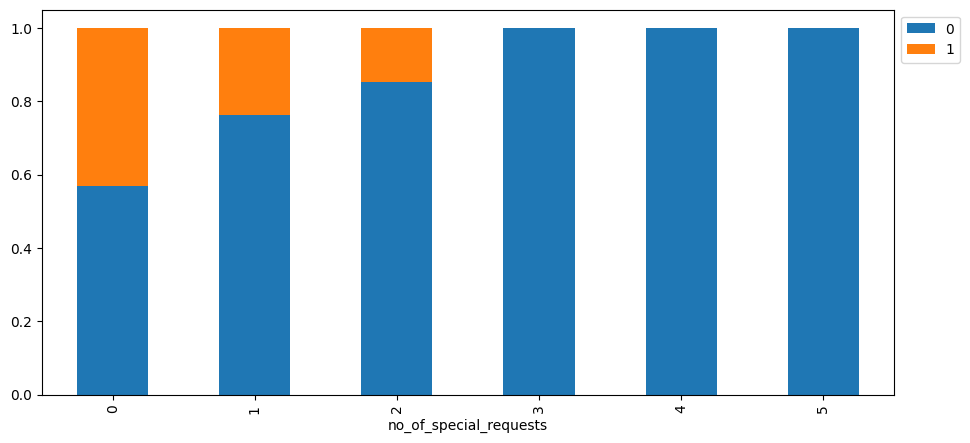

In [37]:
stacked_barplot(df,"no_of_special_requests","booking_status")

### Interpretation

- Guests with **no special requests** have the **highest cancellation rate**, with over 40% canceling.
- As the number of requests increases, cancellations drop significantly guests with 3 or more requests almost never cancel.
  

---

### Do Customers with Special Requests Pay Higher Room Prices?

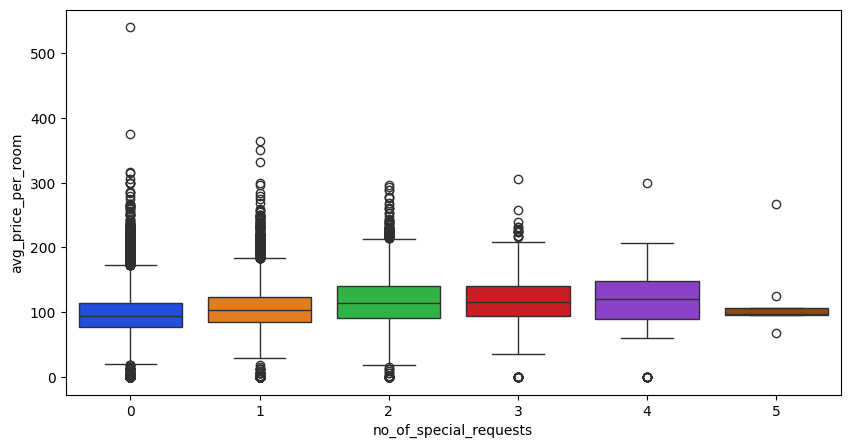

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="no_of_special_requests",y="avg_price_per_room",palette="bright") 
plt.show()

### Interpretation

- Guests who make **more special requests** tend to book rooms with **higher average prices**.
- This may indicate that customers willing to pay more expect a more personalized experience, or that higher tier rooms come with more available options to request.
- Despite some overlap, the median price gradually rises from 0 to 4 requests, before flattening at 5 due to fewer data points.

--- 

### Is There a Relationship Between Booking Cancellations and Room Price?

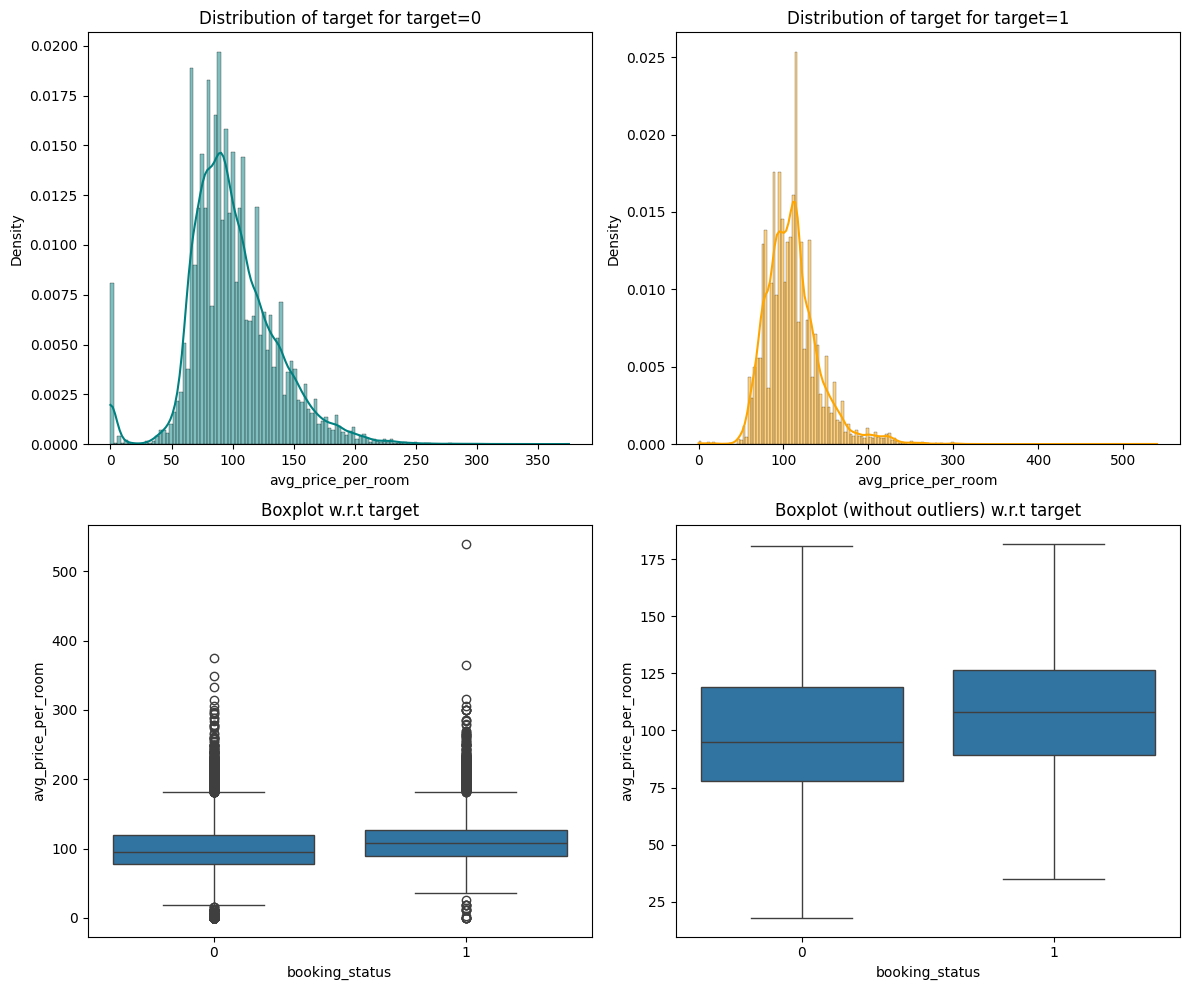

In [39]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

### Interpretation

- The distribution and boxplots reveal that canceled bookings tend to have a higher average price per room compared to non-canceled ones.

### Does Lead Time Influence the Likelihood of Booking Cancellations?

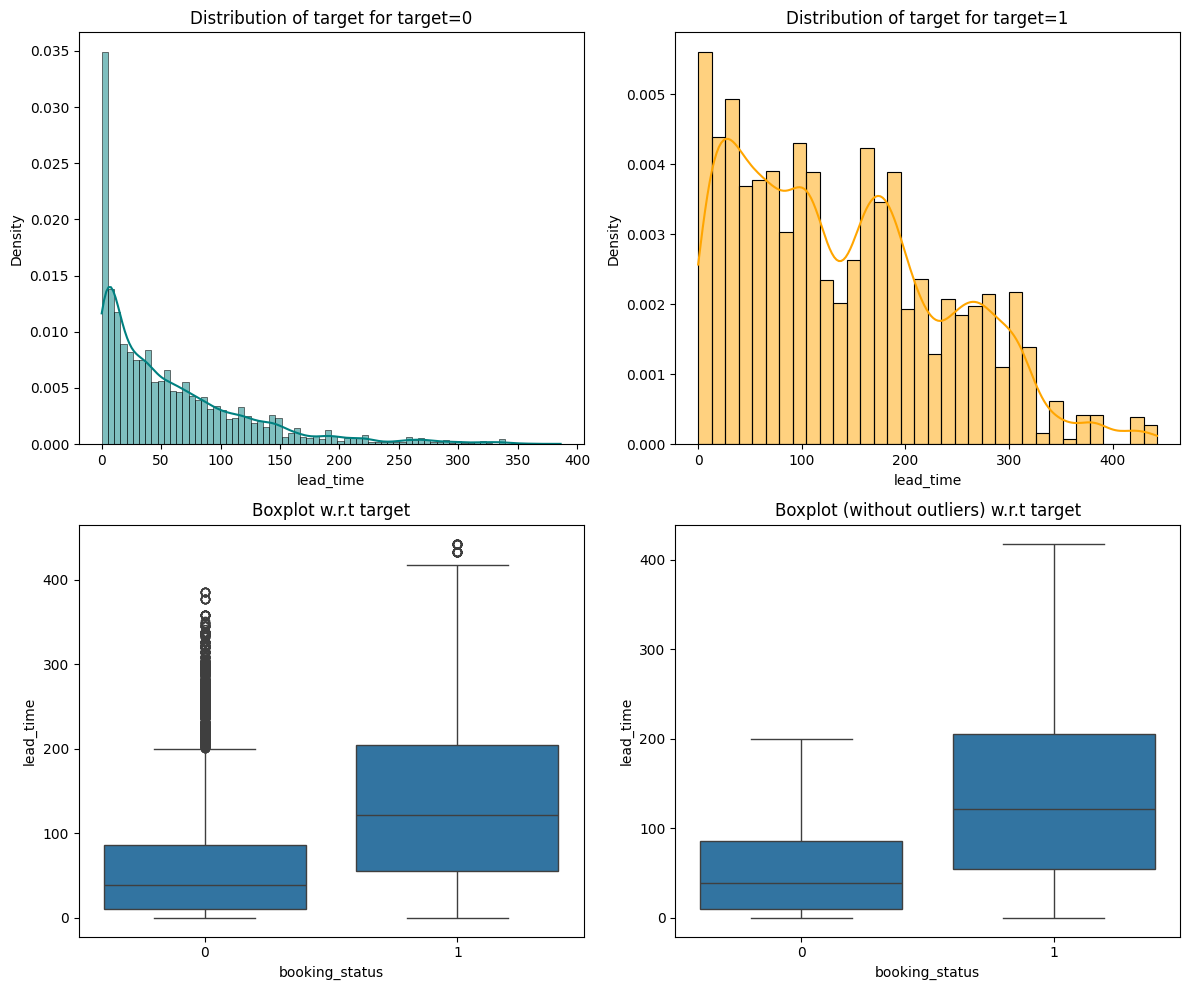

In [40]:
distribution_plot_wrt_target(df,"lead_time", "booking_status")

### Interpretation

- Bookings with longer lead times show higher cancellation rates, while short notice reservations are more likely to be honored.

--- 

### Family Travelers Cancel More or Less Often?

In [41]:
family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family_data.shape

(28441, 19)

In [42]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


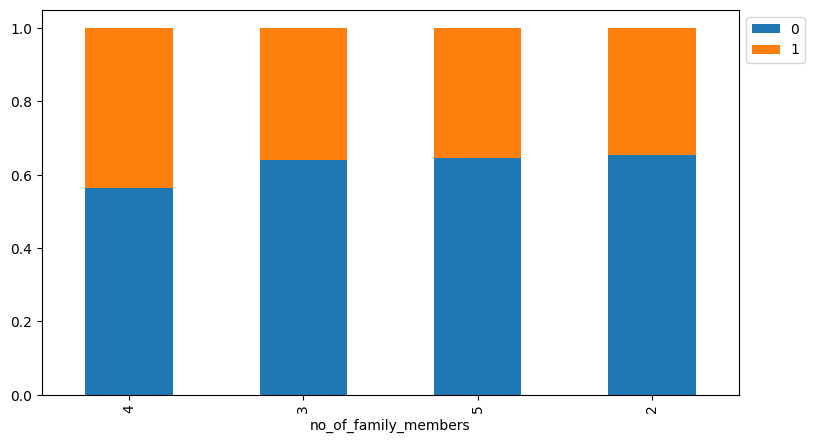

In [43]:
stacked_barplot(family_data,"no_of_family_members", "booking_status")

### Interpretation

There is **no clear pattern** in cancellation rates based on the number of family members.  
Bookings made by families of 2 to 5 members show **similar cancellation behavior**, with only slight variations between groups.


--- 

### Guests Who Stay at Least One Night Cancel Less Frequently?

In [44]:
stay_data = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 19)

In [45]:
stay_data["total_days"] = ( stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

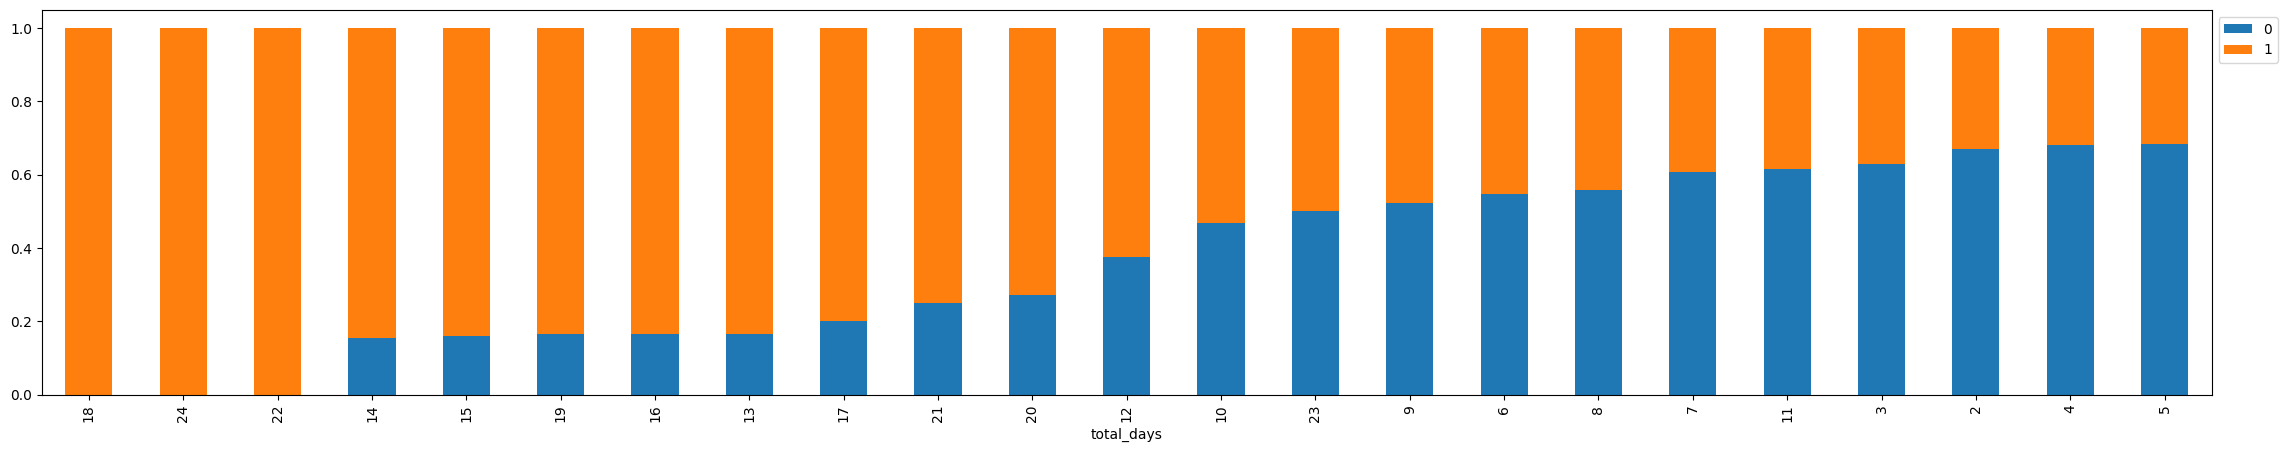

In [46]:
stacked_barplot(stay_data,"total_days","booking_status")

### Interpretation

There is a clear pattern: **longer stays are more likely to be canceled**.

- Bookings with short stays (1–5 nights) have relatively low cancellation rates.
- As the number of total days increases beyond 10, the cancellation rate rises sharply.
- Stays of **14+ nights** are almost entirely canceled.

---

### Cancellation Behavior Among Repeating vs. New Guests

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


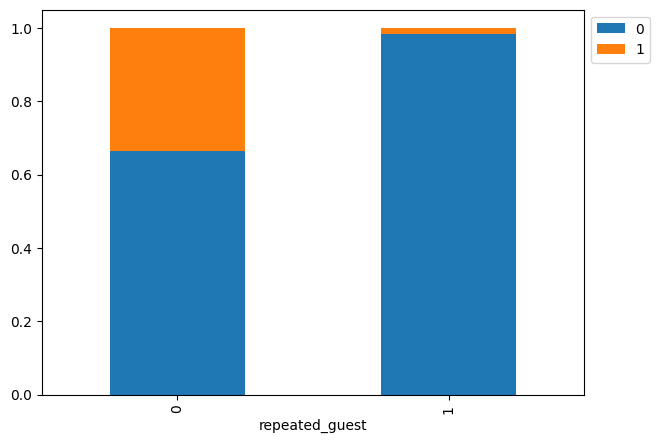

In [47]:
stacked_barplot(df,"repeated_guest","booking_status")

### Interpretation

- **Repeating guests** have an extremely low cancellation rate, with nearly all of them completing their bookings.
- In contrast, **new guests** cancel much more frequently, accounting for the vast majority of cancellations.


---

### What Are the Busiest Months for the Hotel?

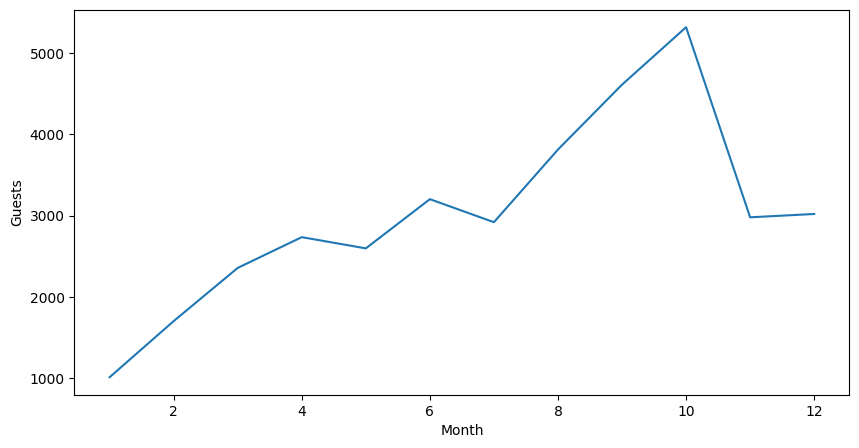

In [48]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = df.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame( {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)})

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

### Interpretation

- The number of guests increases steadily from January, peaking in **October**.
- Months **8 to 10** (August to October) show the highest guest volumes, likely reflecting late summer and early fall travel.
- The sharp drop in November suggests a seasonal shift or off peak period.


---

### Which Months Have the Highest Cancellation Rates?

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


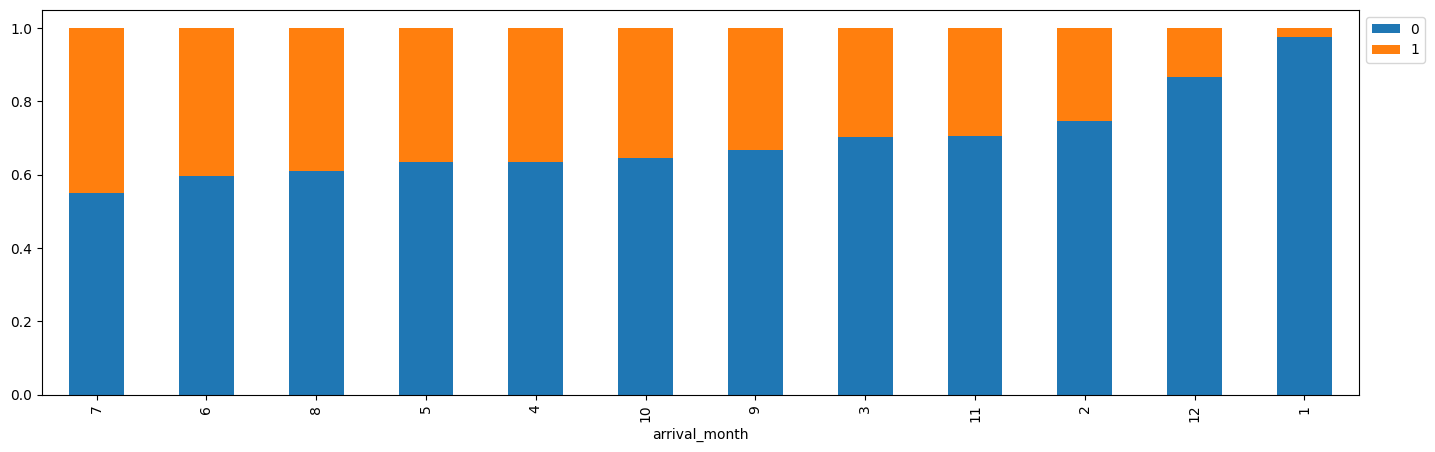

In [49]:
stacked_barplot(df,"arrival_month","booking_status")

### Interpretation

- **Cancellations are more frequent during summer months**, especially in **July** and **August**, when over 40% of bookings are canceled.
- From **September foward**, cancellation rates gradually decline.
- **January and December** show the lowest cancellation rates, with January having almost none.

---

### How Do Room Prices Vary Across Different Months?

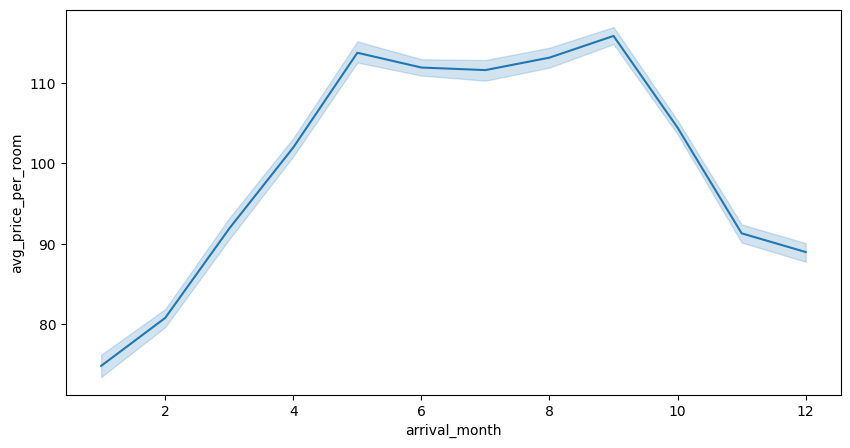

In [50]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="arrival_month",y="avg_price_per_room", )
plt.show()

### Interpretation

- Room prices **increase steadily** from January through May, peaking in **September**, which marks the highest pricing point of the year.
- From **October onward**, prices drop significantly, reaching their lowest in **December**.
- This trend reflects typical **seasonal pricing behavior**, with higher rates during peak travel months and lower rates during off-season.

---

## Data Preprocessing

**Market Segment grouping**

Segments such as **Corporate**, **Complementary**, and **Aviation** were grouped under a new category called Offline. This decision was made based on the following considerations:

- Their volume in the dataset was relatively small, which can lead to unstable model coefficients and inflated p-values during regression analysis.
- From a business perspective, combining them under a single Offline umbrella maintains the essence of their behavior while simplifying interpretation and improving model performance.

In [51]:
df["market_segment_type"].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [52]:
df["market_segment_type"] = df["market_segment_type"].replace({"Corporate": "Offline", "Complementary": "Offline", "Aviation": "Offline"})

In [53]:
df["market_segment_type"].value_counts()

market_segment_type
Online     23214
Offline    13061
Name: count, dtype: int64

---

## Droping columns 

- We dropped the Booking_ID column as it is a unique identifier with no predictive value.
- We removed the columns arrival_date and arrival_year because they provided no predictive value. The arrival_date (day of the month) introduced unnecessary **high cardinality** without contributing meaningfully to cancellation behavior whether a guest arrives on the 3rd or 25th is unlikely to affect their likelihood to cancel. Also, arrival_year had **very low variance**, as nearly all bookings were concentrated in the same year, making it uninformative for modeling purposes.


In [54]:
df.drop(["Booking_ID","arrival_date", "arrival_year"], axis=1, inplace=True)


In [55]:
#check they drop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   market_segment_type                   36275 non-null  object 
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

## Outlier Check and Treatment 

I chose not to treat these outliers, as they carry meaningful information about customer behavior and hotel operations.An exception was made for the no_of_adults variable, lead_time, and avg_price_per_room. 


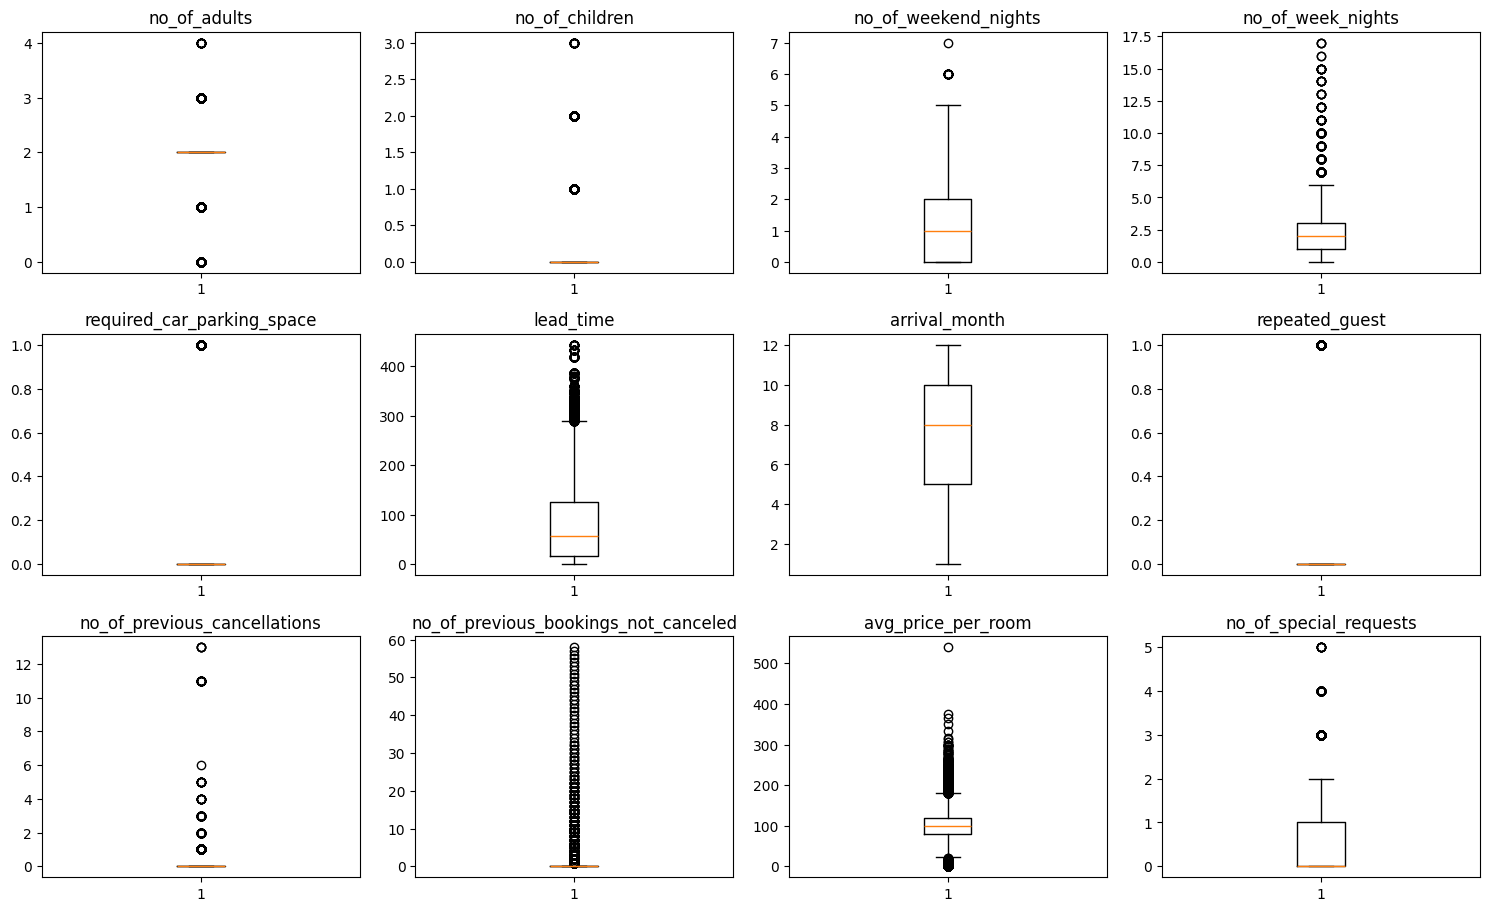

In [56]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

 ### avg_price_per_room

During the univariate analysis of the avg_price_per_room variable, we observed that the majority of bookings had prices concentrated well below €200. Using the Interquartile Range (IQR) method, we calculated an upper whisker threshold of approximately **€179.55**, which already defines the boundary for typical values.

Prices above €500 were rare and far beyond the expected range, likely representing:
- Bulk or long-term corporate bookings
- Manual entry errors or anomalies

In [57]:
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

market_segment_type
Offline    354
Online     191
Name: count, dtype: int64

In [58]:
# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)  

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

np.float64(179.55)

In [59]:
# assigning the outliers the value of upper whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

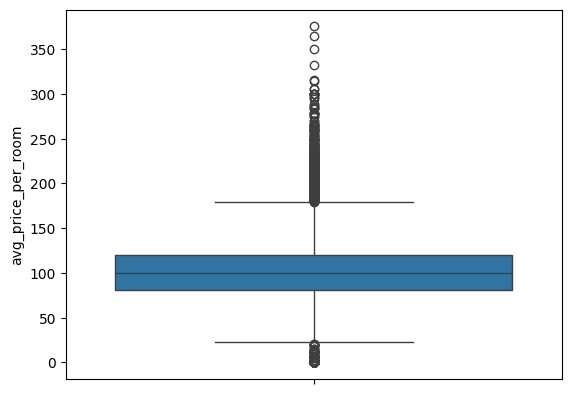

In [60]:
sns.boxplot(data=df, y="avg_price_per_room")
plt.show()

### no_of_adults

The no_of_adults variable, we found a small number of bookings with a value of **0 adults**, which is inconsistent with real world hotel operations a room cannot be reserved without at least one adult.

In [61]:
df["no_of_adults"].value_counts()

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

In [62]:
mode_of_adults = df['no_of_adults'].mode()[0]
df.loc[df['no_of_adults'] == 0, 'no_of_adults'] = mode_of_adults

df["no_of_adults"].value_counts()

no_of_adults
2    26247
1     7695
3     2317
4       16
Name: count, dtype: int64

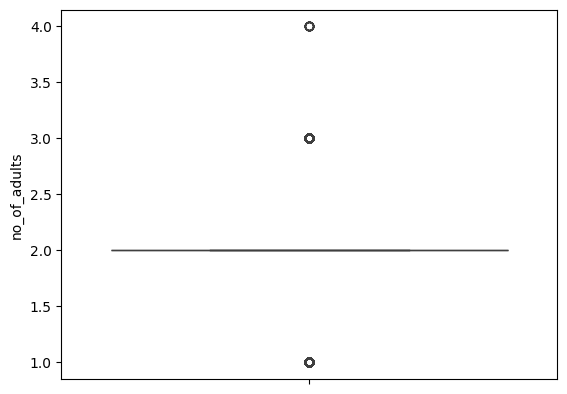

In [63]:
sns.boxplot(data=df, y="no_of_adults") 
plt.show()


### lead_time


h
Hospitality industry standards, bookings made **more than 10 months in advance (300+ days)** are extremely rare and typically account for **less than 1% of total reservations**.

To reduce the influence of these extreme values and improve model robustness, we capped lead_time at **300 days**.

In [64]:
df['lead_time'] = df['lead_time'].apply(lambda x: min(x, 300))

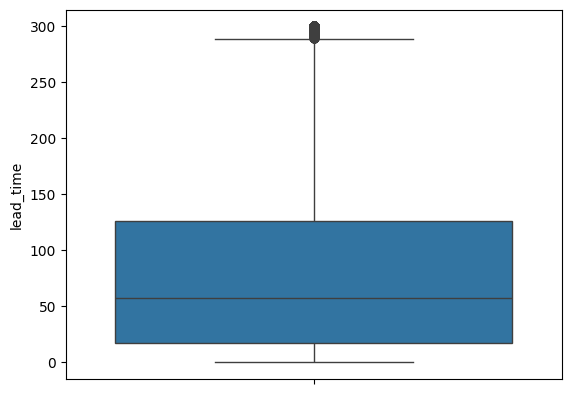

In [65]:
sns.boxplot(data=df, y="lead_time")
plt.show()

---

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
- Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

**Which case is more important?**

Both the cases are important as:

If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.

**How to reduce the losses?**

Hotel need a F1 Score to be maximized, greater the F1 score higher are the chances of minimizing **False Negatives** and **False Positives**.

I make a functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
The model_performance_classification_statsmodels function will be used to check the model performance of models.
The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [66]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [67]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression

**Data Preparation for modeling**

We want to predict which bookings will be canceled.
Before we proceed to build a model, we'll have to encode categorical features.
We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [68]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X,drop_first=True) 

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [69]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 23)
Shape of test set :  (10883, 23)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


### Building Logistic Regression Model

In [70]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit() 

print(lg.summary()) 

Optimization terminated successfully.
         Current function value: 0.428590
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Wed, 07 May 2025   Pseudo R-squ.:                  0.3237
Time:                        19:59:33   Log-Likelihood:                -10883.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -4.5047      0.

In [71]:
print("Training performance:")
X_train_temp = np.array(X_train).astype(float)
model_performance_classification_statsmodels(lg, X_train_temp, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80108,0.62669,0.73096,0.67482


### Multicollinearity

In [72]:
for col in X_train.columns:
    if X_train[col].dtype == bool:
        X_train[col] = X_train[col].astype(int)

for col in X_test.columns:
    if X_test[col].dtype == bool:
        X_test[col] = X_test[col].astype(int)

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [73]:
checking_vif(X_train)

,feature,VIF
0,const,30.20635
1,no_of_adults,1.28754
2,no_of_children,2.05428
3,no_of_weekend_nights,1.05995
4,no_of_week_nights,1.09190
5,required_car_parking_space,1.03562
6,lead_time,1.20036
7,arrival_month,1.05005
8,repeated_guest,1.59949
9,no_of_previous_cancellations,1.37892


### Backward Elimination based on p-values
- Iteratively removes the variable with the highest p-value above 0.05
- Until all remaining features are statistically significant.

In [74]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Online']


In [75]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [76]:
logit1 = sm.Logit(y_train,X_train1.astype(float)) 
lg1 = logit1.fit()
print(lg1.summary()) 

Optimization terminated successfully.
         Current function value: 0.428682
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Wed, 07 May 2025   Pseudo R-squ.:                  0.3235
Time:                        19:59:36   Log-Likelihood:                -10885.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.4504      0.094    -47.316     

In [77]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1,y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80045,0.62597,0.72972,0.67388


### Converting coefficients to odds

The coefficients of the logistic regression model are in terms of log(odd).

To interpret them as **odds**, we apply the exponential function:

- **Odds** = exp(coefficient)

To understand the **percentage change** in odds for a one unit increase in the feature:

- **% Change in Odds** = (exp(coefficient) - 1) × 100

In [78]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Online
Odds,0.01167,1.15113,1.11165,1.04104,0.20262,1.01638,0.94017,0.12369,1.18620,1.02066,0.23827,1.41990,0.67970,0.80831,0.57933,0.36913,0.24121,5.33252
Change_odd%,-98.83265,15.11336,11.16540,4.10376,-79.73752,1.63785,-5.98257,-87.63130,18.61979,2.06643,-76.17318,41.99045,-32.02977,-19.16918,-42.06699,-63.08684,-75.87851,433.25154


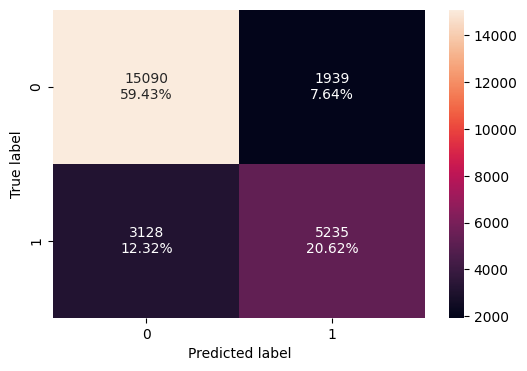

In [79]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [80]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1,y_train) 
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80045,0.62597,0.72972,0.67388


### To improve model performance (recall), we analyze and adjust the threshold using:

- **ROC–AUC Curve**: To identify the point where True Positive Rate is high and False Positive Rate is low.
- **Precision–Recall Curve**: To find a balance between precision and recall based on business priorities.

The goal is to select the threshold that **maximizes relevant metrics** (like F1 score or recall), depending on the business context.

**Optimal threshold using ROC-AUC curve**

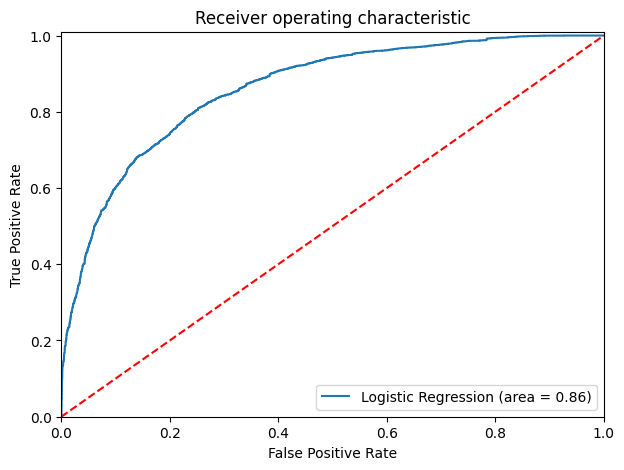

In [81]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [82]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.2947124504131964


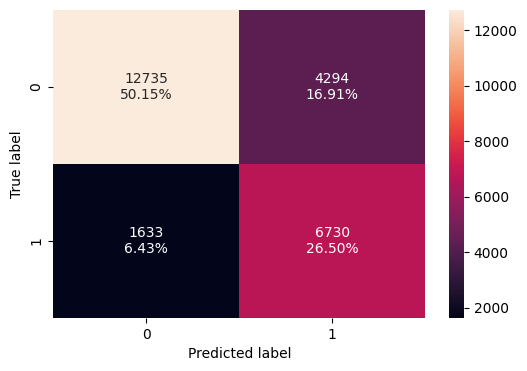

In [83]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1,X_train1,y_train,optimal_threshold_auc_roc
)

In [84]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.76658,0.80474,0.61049,0.69428


### Precision-Recall curve 

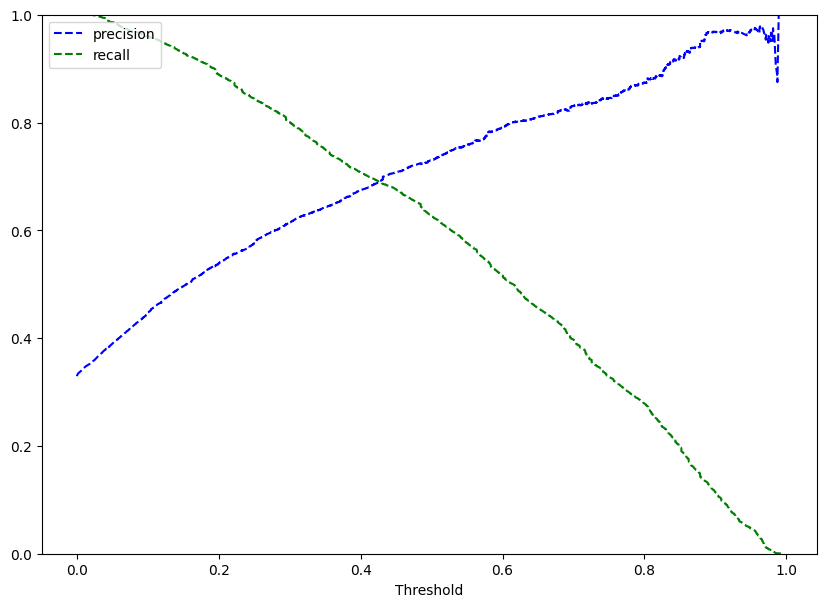

In [85]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [86]:
# setting the threshold
optimal_threshold_curve = 0.42

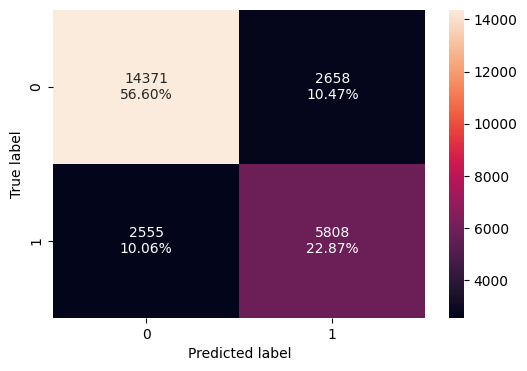

In [87]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1,X_train1,y_train,optimal_threshold_curve)

In [88]:
# checking model performance for this model
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79470,0.69449,0.68604,0.69024


### Performance on the test set

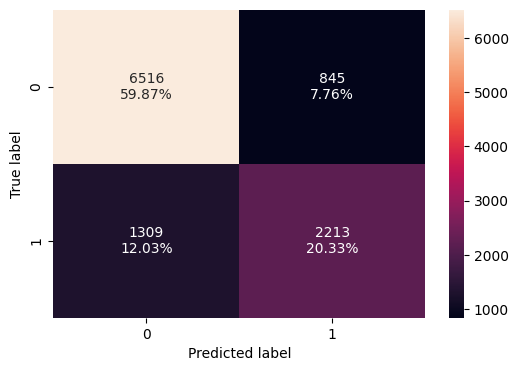

In [89]:
#  creating confusion matrix
confusion_matrix_statsmodels(lg1,X_test1,y_test)

In [90]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1,X_test1,y_test)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80208,0.62834,0.72368,0.67264


### Using model with threshold=0.37

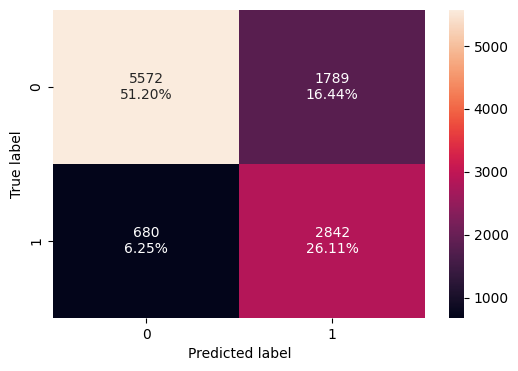

In [91]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1,X_test1,y_test,optimal_threshold_auc_roc)

In [92]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.77313,0.80693,0.61369,0.69717


### Using model with threshold = 0.42

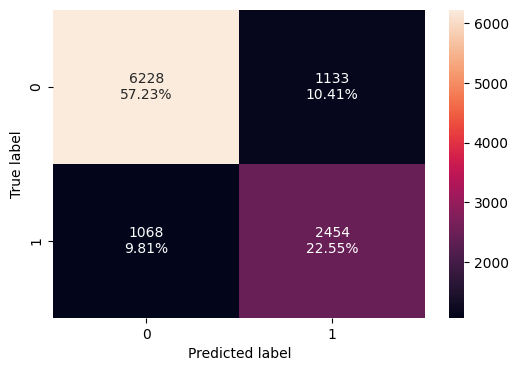

In [93]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1,X_test1,y_test,optimal_threshold_curve)

In [94]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79776,0.69676,0.68414,0.69039


### Logistic Regression Model Performance Summary

In [95]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80045,0.76658,0.79470
Recall,0.62597,0.80474,0.69449
Precision,0.72972,0.61049,0.68604
F1,0.67388,0.69428,0.69024


In [96]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df 

Test performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80208,0.77313,0.79776
Recall,0.62834,0.80693,0.69676
Precision,0.72368,0.61369,0.68414
F1,0.67264,0.69717,0.69039


---

### Decision Tree

**Data Preparation for modeling** 

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [97]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X,drop_first=True) 

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [98]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 22)
Shape of test set :  (10883, 22)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


I make the functions to calculate different metrics and confusion matrix 

The model_performance_classification_sklearn function will be used to check the model performance of models.
The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [99]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [100]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building Decision Tree Model

In [101]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

### Model performance on training set

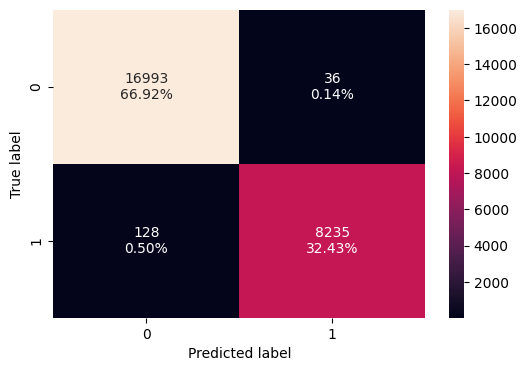

In [102]:
confusion_matrix_sklearn(model,X_train,y_train)

In [103]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)

print("Training performance")
decision_tree_perf_train


Training performance


,Accuracy,Recall,Precision,F1
0,0.99354,0.98469,0.99565,0.99014


### Model performance on test set

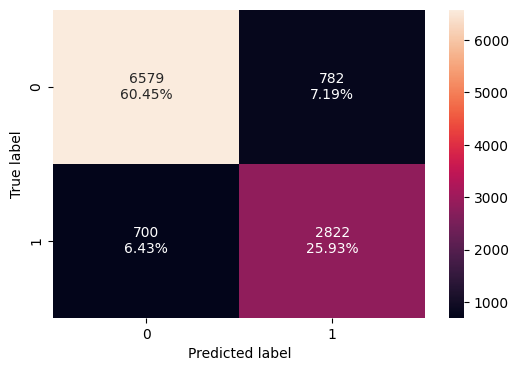

In [104]:
confusion_matrix_sklearn(model,X_test,y_test)

In [105]:
decision_tree_perf_test = model_performance_classification_sklearn(model,X_test,y_test) 

print("Test performance")
decision_tree_perf_test

Test performance


,Accuracy,Recall,Precision,F1
0,0.86382,0.80125,0.78302,0.79203


### Important features.

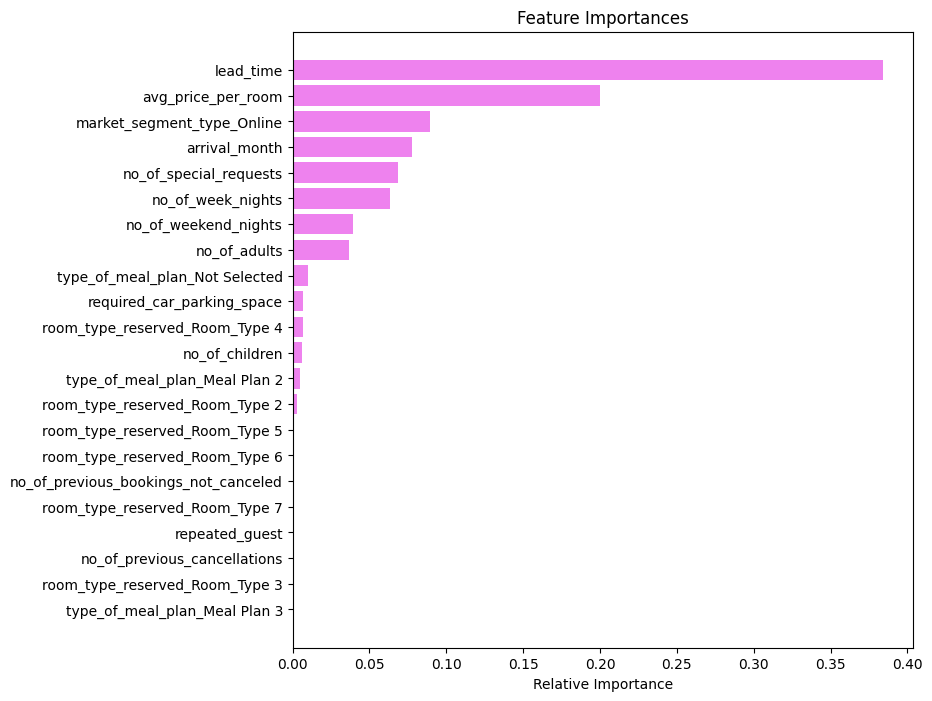

In [106]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Pruning the tree

### Pre-Pruning

In [107]:
# Type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50], 
    "min_samples_split": [10, 30, 50, 70],
    "min_samples_leaf":[30,100,200],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(6),
                       max_leaf_nodes=50, min_samples_leaf=30,
                       min_samples_split=70, random_state=1)

### Model performance on training set

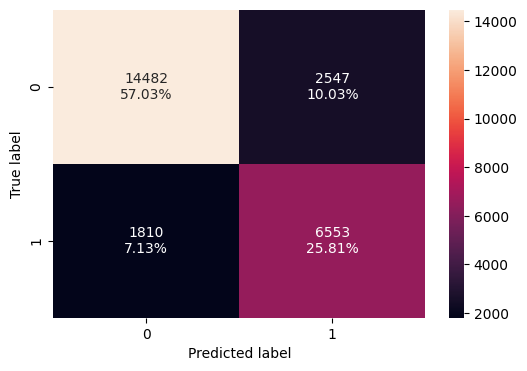

In [108]:
confusion_matrix_sklearn(estimator,X_train,y_train)

In [109]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator,X_train,y_train) 

print("Training performance")
decision_tree_tune_perf_train

Training performance


,Accuracy,Recall,Precision,F1
0,0.82841,0.78357,0.72011,0.75050


### Model performance on test set

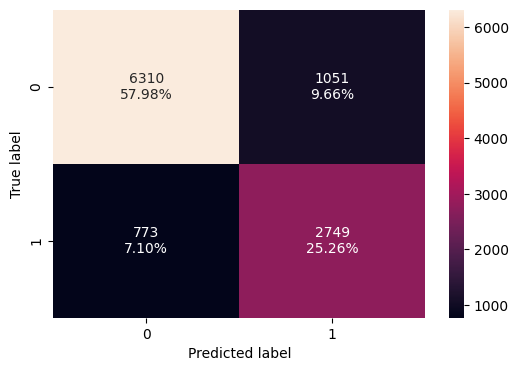

In [110]:
confusion_matrix_sklearn(estimator,X_test,y_test)

In [111]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator,X_test,y_test) 

print("Test performance")
decision_tree_tune_perf_test

Test performance


,Accuracy,Recall,Precision,F1
0,0.83240,0.78052,0.72342,0.75089


### Visualizing the Decision Tree

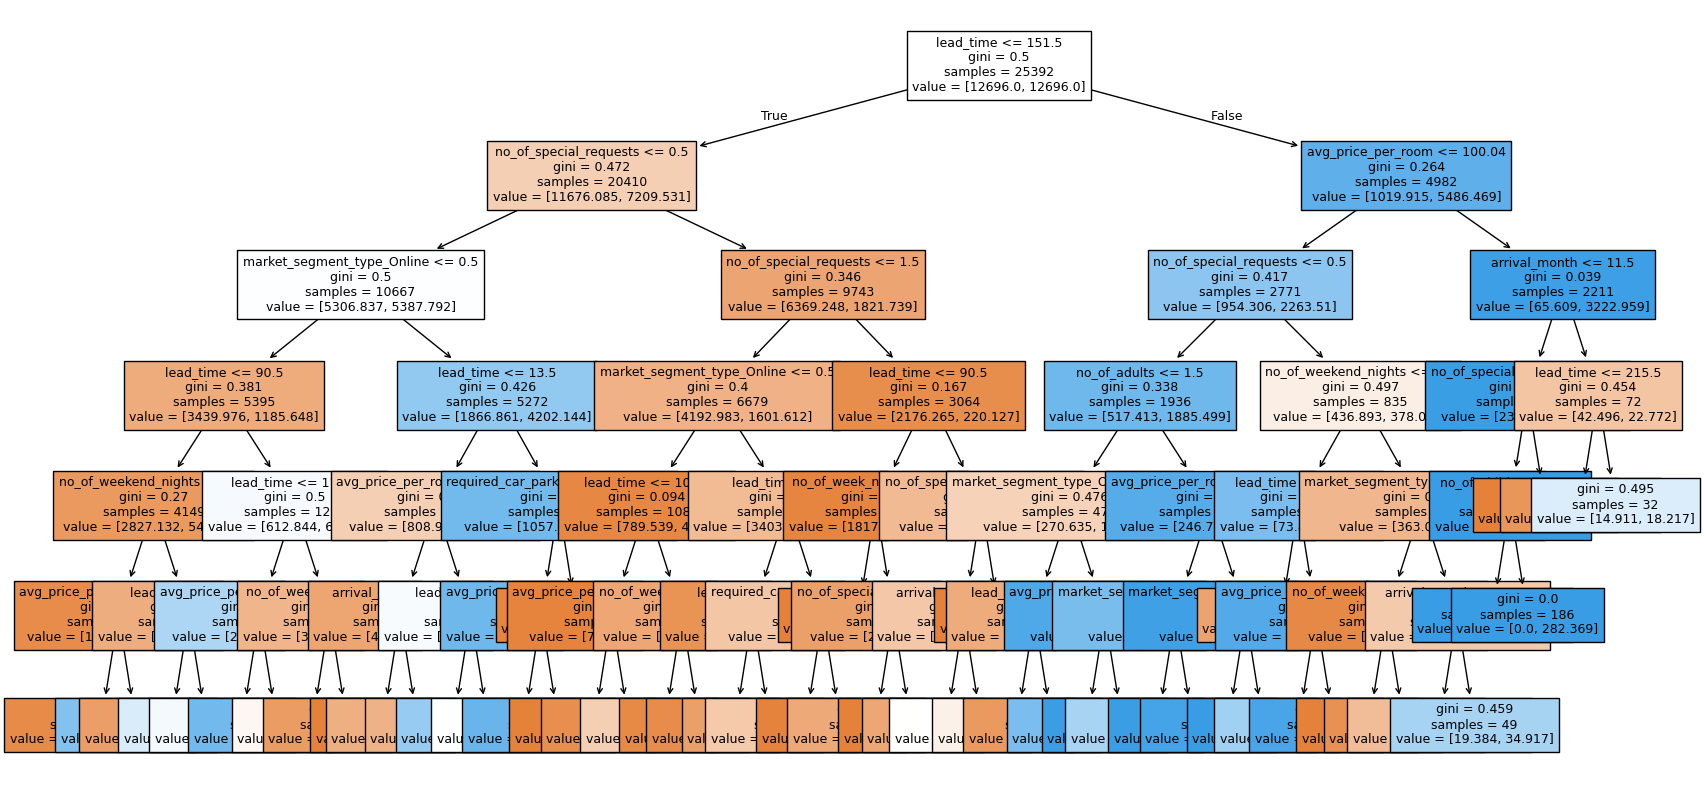

In [112]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [113]:
# Text report showing the rules of a decision tree 
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 169.69
|   |   |   |   |   |   |--- weights: [1727.44, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  169.69
|   |   |   |   |   |   |--- weights: [9.69, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

### Important features

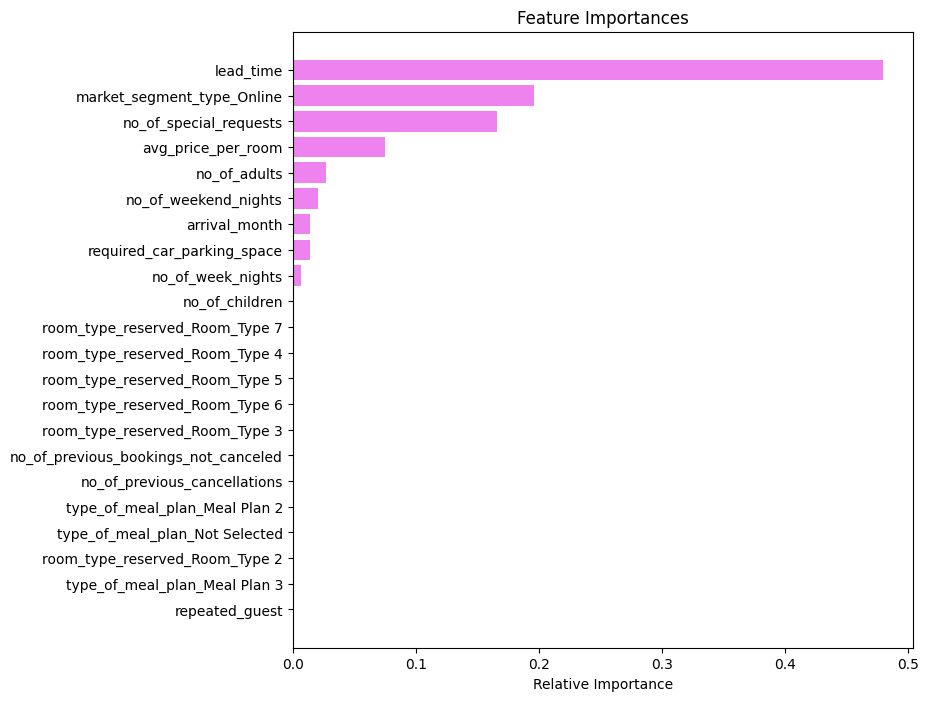

In [114]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Post-Prunning

In [115]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [116]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00913
1,0.00000,0.00913
2,0.00000,0.00913
3,0.00000,0.00913
4,0.00000,0.00913
...,...,...
1948,0.00890,0.32806
1949,0.00980,0.33786
1950,0.01272,0.35058
1951,0.03412,0.41882


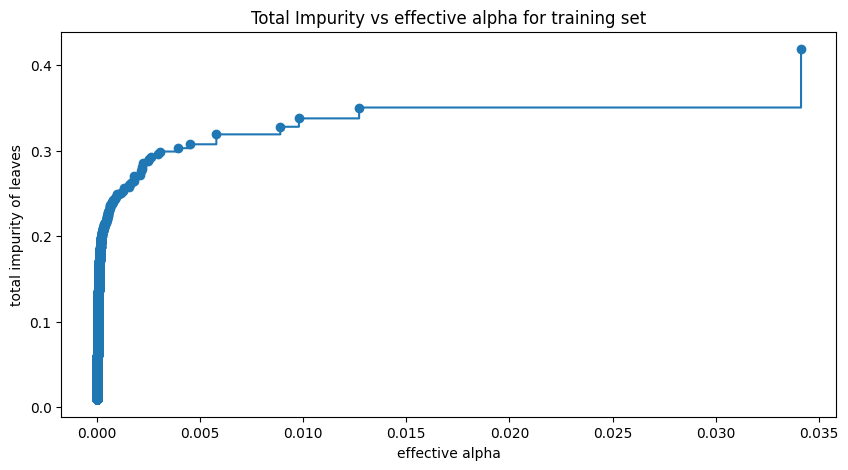

In [117]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

We train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [118]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train,y_train) 
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136915


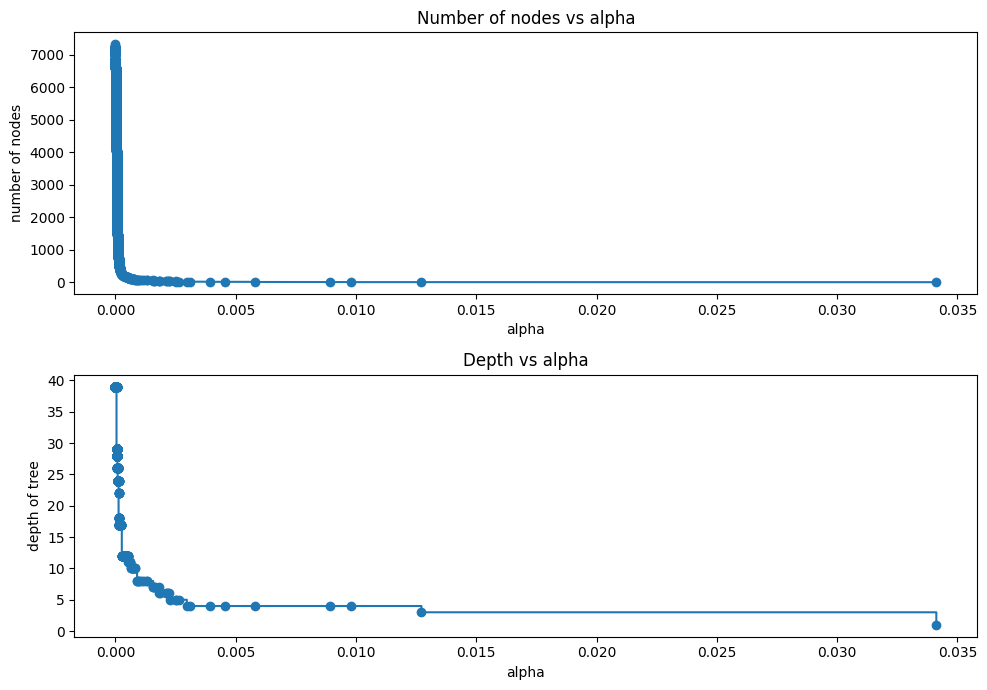

In [119]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [120]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

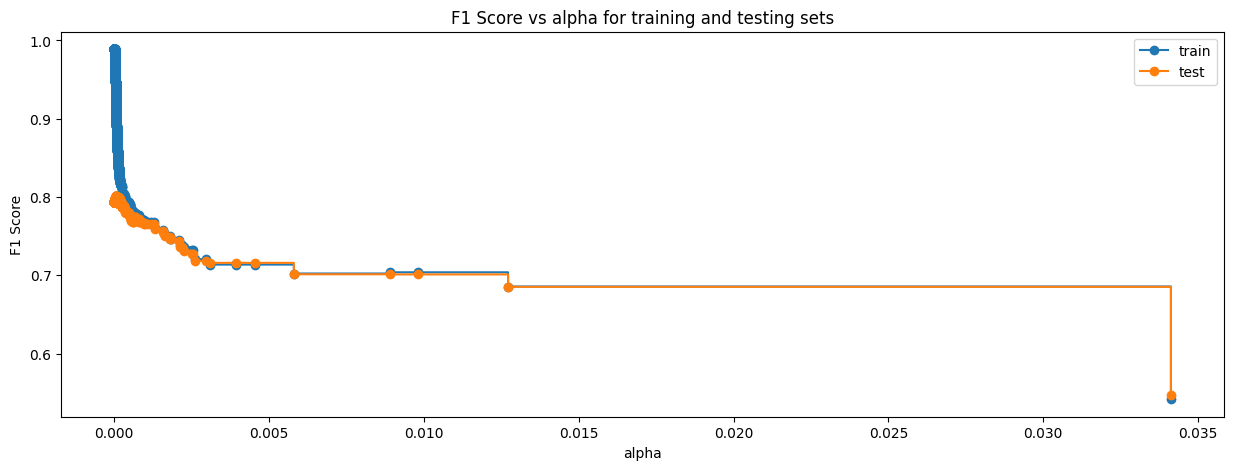

In [121]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [122]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(5.169068295321317e-05),
                       class_weight='balanced', random_state=1)


### Model performance on training set

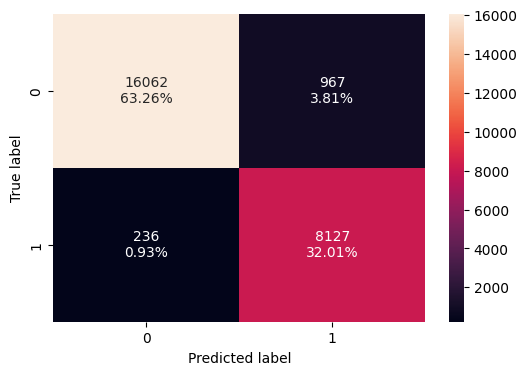

In [123]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [124]:
decision_tree_post_perf_train = model_performance_classification_sklearn(best_model, X_train, y_train)

print("Training performance")
decision_tree_post_perf_train

Training performance


,Accuracy,Recall,Precision,F1
0,0.95262,0.97178,0.89367,0.93109


### Model performance on test set

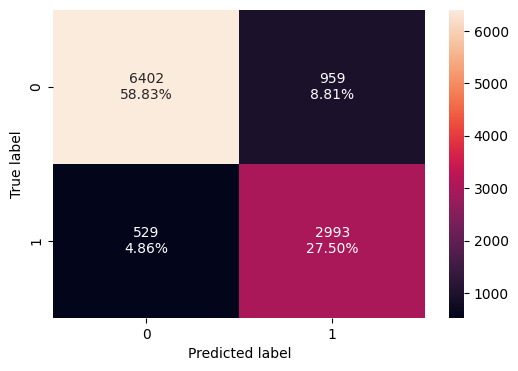

In [125]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [126]:
decision_tree_post_test = model_performance_classification_sklearn(best_model, X_test, y_test) 

print("Test Performance")
decision_tree_post_test

Test Performance


,Accuracy,Recall,Precision,F1
0,0.86327,0.84980,0.75734,0.80091


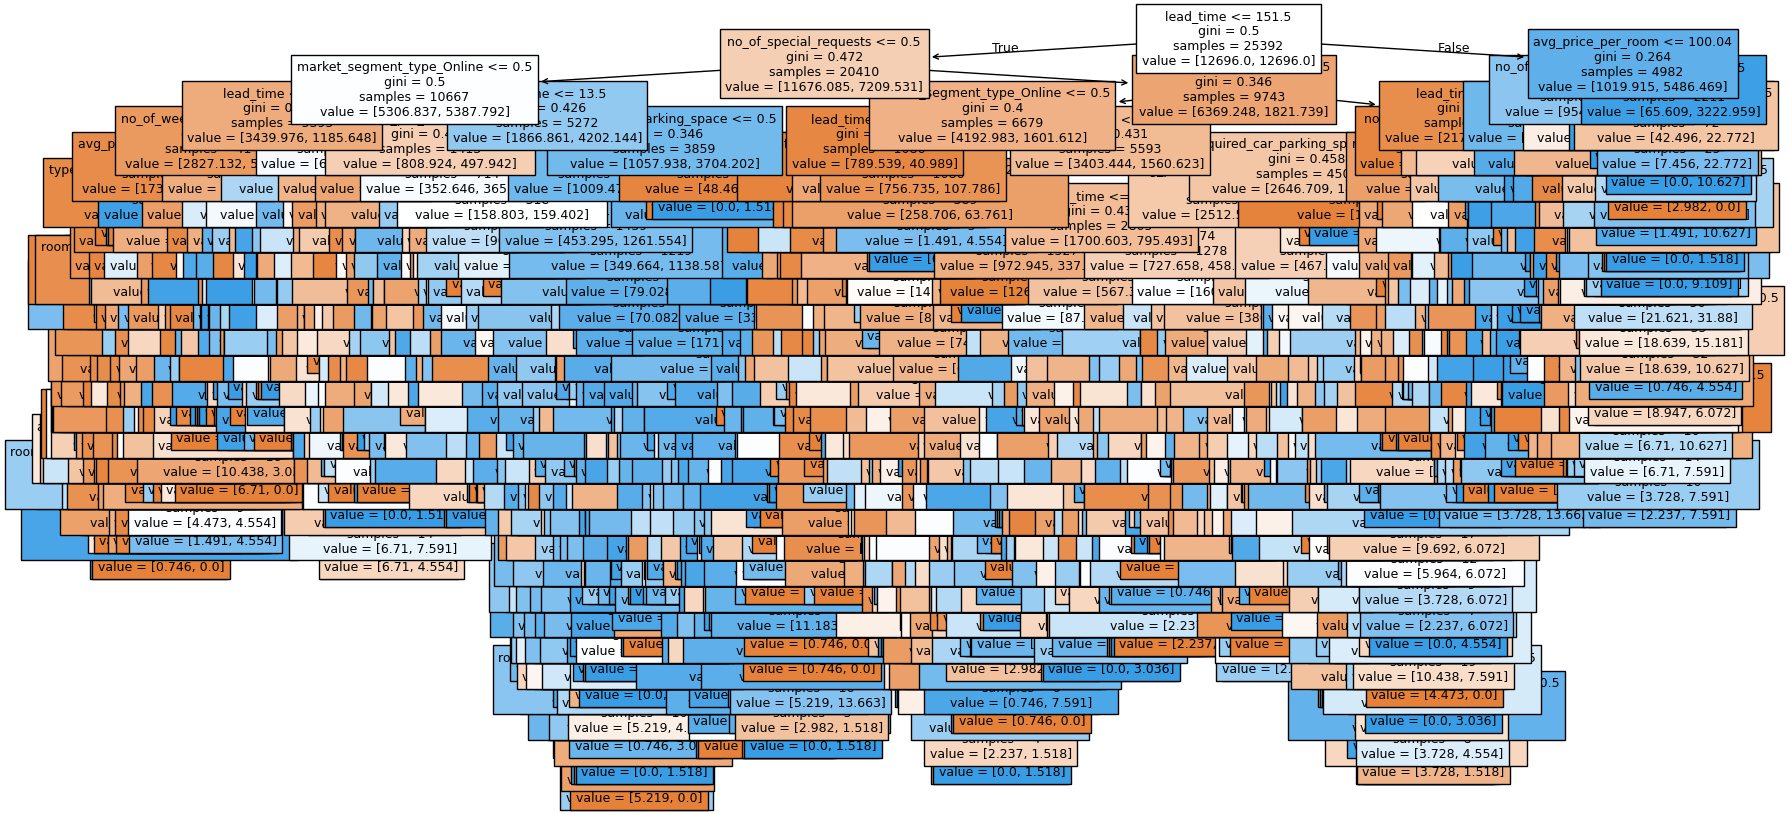

In [127]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [128]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- type_of_meal_plan_Meal Plan 2 <= 0.50
|   |   |   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |   |   |--- no_of_week_nights <= 2.50
|   |   |   |   |   |   |   |   |   |--- lead_time <= 86.50
|   |   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [73.06, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- lead_time >  86.50
|   |   |   |   |   |   |   |   |   |   |--- type_of_meal_plan_Not Selected <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00

### Important Features Summary

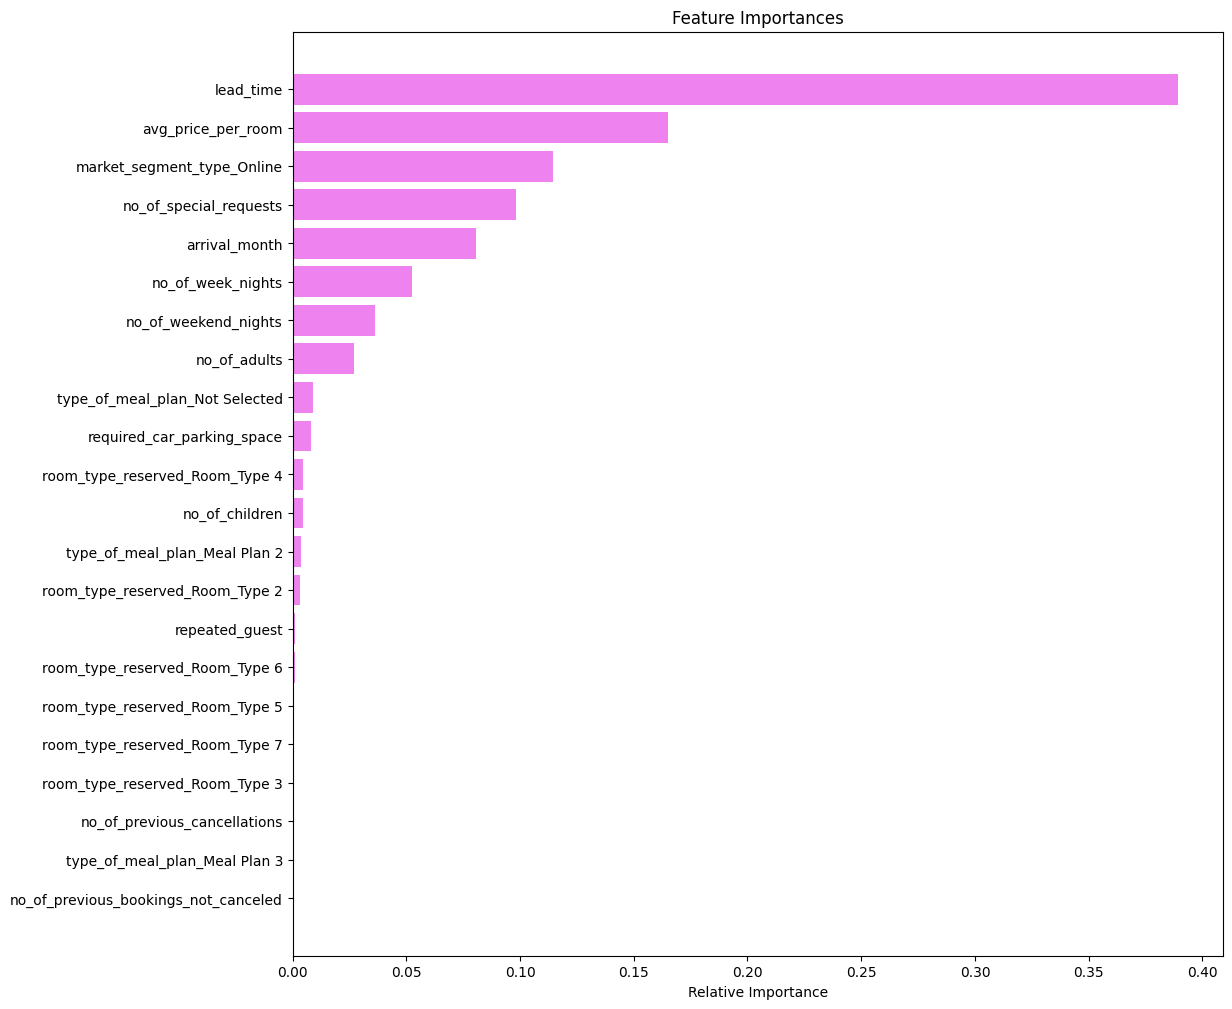

In [129]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comparing Decision Tree models

In [130]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99354,0.82841,0.95262
Recall,0.98469,0.78357,0.97178
Precision,0.99565,0.72011,0.89367
F1,0.99014,0.75050,0.93109


In [131]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.86382,0.83240,0.86327
Recall,0.80125,0.78052,0.84980
Precision,0.78302,0.72342,0.75734
F1,0.79203,0.75089,0.80091


### Conclusion

See the [README.md](README.md) file for a detailed conclusion. 
